# <font color='green'>Introduction</font>

<blockquote>The Cornell Hotel Sustainability Benchmarking Index (CHSB) is an industry-led global data initiative, started in 2013 to enable any hotel to calculate its carbon footprint and benchmark its energy, water and carbon emissions at low cost, drawing from a dataset of over 25,000 hotels around the world. Participants in the CHSB index include major hotel brands, operators and owners, representing a total of 646 geographies (64 countries, 84 regions, 410 metro areas, 88 climate zones.)
</blockquote>

**5 datasets from year 2018 to 2023 (excluding 2022)** is available for [download here](https://greenview.sg/services/chsb-index/). **Each dataset covers the calendar year of 2 years prior to publishing year** *i.e. 2018 dataset will cover 2016 data.* 
Due to the impact of Covid-19 on the hotel sector in 2020, the CHSB Index was not published in 2022, but resumed in 2023 with an analysis of 2021 performance. 

The data explains its measuring definition as follow:

* Measure 1 - Carbon footprint of 1 room-night stay, per the [HCMI](https://sustainablehospitalityalliance.org/resource/hotel-carbon-measurement-initiative/) methodology
* Measure 1a - Carbon footprint representing lower and upper quartile of 1 room-night stay, per the HCMI methodology
* Measure 2 - Total carbon footprint of a property for the calendar year, divided by its number of rooms
* Measure 3 - Total carbon footprint of a property for the calendar year, divided by its number of OCCUPIED rooms within the same calendar year period
* Measure 4 - Total carbon footprint of a property for the calendar year, divided by its total floor area in SQUARE METRE
* Measure 4a - Total carbon footprint of a property for the calendar year, divided by its total floor area in SQUARE FEET
* Measure 5 - Total energy usage of a property for the calendar year, divided by its number of OCCUPIED rooms within the same calendar year period
* Measure 6 - Total energy usage of a property for the calendar year, divided by its floor area in SQUARE METRES
* Measure 6a - Total energy usage of a property for the calendar year, divided by its floor area in SQUARE FEET
* Measure 7 - Carbon footprint of 1 square meter of meeting space occupied for 1 hour, per the HCMI methodology
* Measure 8 - Total water usage of a property for the calendar year, divided by its total number of OCCUPIED ROOMS
* Measure 9 - Total water usage of a property for the calendar year, divided by its floor area in SQUARE METRES
* Measure 9a - Total water usage of a property for the calendar year, divided by its floor area in SQUARE FEET
* Measure 10 - Water usage of 1 room night stay, per the [HWMI](https://sustainablehospitalityalliance.org/resource/hotel-water-measurement-initiative) methodology
* Measure 11 - Water usage of 1 square meter of meeting space occupied for 1 hour, per the HWMI methodology
* Measure 12 - Hotel Energy from Renewables (%)

**The datasets capture GHG Emissions Scope 1, 2 and 3, with the following boundaries**:
* Scope 1 and 2 from activities or amenities located within hotel premises including restaurants, meeting spaces, shops, casinos, golf courses, spas, garden space, fitness centres, ‘back of house’. **Excluding private space which is not accessible to hotel guests or conference attendees** (e.g. private apartments) or not related to the hotel (e.g. the hotel leases a floor to a third party, such as restaurants, shops, hairdressers, etc.). On-site staff accommodation is also considered private space.

* Scope 3 includes outsourced laundry operations. **Excluding emissions coming from activities such as travel (guests’ travel to and from the hotel and employees’ business travel), production of purchased materials and consumables in the hotel, waste disposal, product use, and other outsourced activities (except laundry).**

# <font color='green'>Goal</font>
With datasets spanning 2016 - 2021 (excluding 2020) and the participation of 64 countries, I am curious to find answers to these questions:

1. What are the carbon emission trends from the past 5 years?
2. Where are the largest and lowest emissions? Can they exchange pointers?
3. As hotel building/operational standards are built upon its market segment classification, it will be interesting to compare emissions across different hotel segments?

_____________________________________________________________

## <font color='green'>Data Import</font>

We will first import the *2021 dataset* to see how we may apply the same data cleaning technique to the rest of the dataset later.
The measures are arranged in tabs in an excel file format which we will proceed to import and save into seperate dataframes.
Note that we will not be using the `SQUARE FEET` data and will exclude these tabs when importing.

In [1]:
# Main libraries for data manipulation
import pandas as pd
import numpy as np

# Libraries for data visualization
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()
import matplotlib.pyplot as plt
import seaborn as sns

# Useful libraries
import warnings
warnings.filterwarnings('ignore')


#excel file contains multiple tabs, loading in sheet names
xls = pd.ExcelFile('Hotel Sustainability Benchmarking Index 2021.xlsx')
names = xls.sheet_names
names

['Key',
 'Introduction',
 "What's New",
 'CHSB Uses',
 'Geographies',
 'How to Guide',
 'Tool',
 'M1',
 'M1a',
 'M2',
 'M3',
 'M4',
 'M4a',
 'M5',
 'M6',
 'M6a',
 'M7',
 'M8',
 'M9',
 'M9a',
 'M10',
 'M11',
 'M12']

In [2]:
#assigning df names to each tab
carbon_1_night_2021 = pd.read_excel(xls, sheet_name='M1', header=None)
total_carbon_room_2021 = pd.read_excel(xls, sheet_name='M2', header=None)
total_carbon_room_occupied_2021 = pd.read_excel(xls, sheet_name='M3', header=None)
total_carbon_area_2021 = pd.read_excel(xls, sheet_name='M4', header=None)
total_energy_occupied_room_2021 = pd.read_excel(xls, sheet_name='M5', header=None)
total_energy_area_2021 = pd.read_excel(xls, sheet_name='M6', header=None)
carbon_meeting_hour_2021 = pd.read_excel(xls, sheet_name='M7', header=None)
total_water_occupied_rooms_2021= pd.read_excel(xls, sheet_name='M8', header=None)
total_water_area_2021 = pd.read_excel(xls, sheet_name='M9', header=None)
water_1_night_2021= pd.read_excel(xls, sheet_name='M10', header=None)
water_meeting_hour_2021 = pd.read_excel(xls, sheet_name='M11', header=None)
renewable_energy_percentage_2021 = pd.read_excel(xls, sheet_name='M12', header=None)

carbon_1_night_2021.head()

0           1    \
0  MEASURE 1: HCMI Rooms Footprint Per Occupied R...         NaN   
1                                           LOCATION         NaN   
2                                                NaN         NaN   
3                                          Geography        Type   
4                                           Aberdeen  Metro Area   

              2                3              4                         5    \
0             NaN              NaN            NaN                       NaN   
1             NaN       All Hotels            NaN                       NaN   
2             NaN  All HotelsCount  All HotelsLow  All HotelsLower Quartile   
3         Country            Count            Low            Lower Quartile   
4  United Kingdom              NaN            NaN                       NaN   

              6                 7                         8               9    \
0             NaN               NaN                       NaN             NaN   
1             NaN               NaN                       NaN             NaN   
2  All HotelsMean  All HotelsMedian  All HotelsUpper Quartile  All HotelsHigh   
3            Mean            Median            Upper Quartile            High   
4             NaN               NaN                       NaN             NaN   

   ...          185        186           187         188  \
0  ...          NaN        NaN           NaN         NaN   
1  ...          NaN        NaN       5 Stars         NaN   
2  ...  4 StarsHigh  4 StarsSD  5 StarsCount  5 StarsLow   
3  ...         High         SD         Count         Low   
4  ...          NaN        NaN           NaN         NaN   

                     189          190            191                    192  \
0                    NaN          NaN            NaN                    NaN   
1                    NaN          NaN            NaN                    NaN   
2  5 StarsLower Quartile  5 StarsMean  5 StarsMedian  5 StarsUpper Quartile   
3         Lower Quartile         Mean         Median         Upper Quartile   
4                    NaN          NaN            NaN                    NaN   

           193        194  
0          NaN        NaN  
1          NaN        NaN  
2  5 StarsHigh  5 StarsSD  
3         High         SD  
4          NaN        NaN  

[5 rows x 195 columns]

In [3]:
carbon_1_night_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Columns: 195 entries, 0 to 194
dtypes: object(195)
memory usage: 894.4+ KB


## <font color='green'>Observations</font>

There are **195 columns and 587 rows**, we can see there many null values and columns we may not require in our analysis. 

## <font color ='green'>Data Manipulation - organising columns</font>

Due to the formatting of the excel file, there is a larger header space, and misaligned column names when imported into dataframes.
We will proceed to organise these columns next.

In [4]:
all_df = [carbon_1_night_2021, total_carbon_room_2021, total_carbon_room_occupied_2021, total_carbon_area_2021, 
          total_energy_occupied_room_2021,total_energy_area_2021, carbon_meeting_hour_2021,
          total_water_occupied_rooms_2021, total_water_area_2021, water_1_night_2021, water_meeting_hour_2021, renewable_energy_percentage_2021]

for df in all_df:
    #rename row 2 column 0,1,2 into Geography, Type, Country
    df.iloc[2,0] = 'Geography'
    df.iloc[2,1] = 'Type'
    df.iloc[2,2] = 'Country'
    #select row 2 to be the column names
    df.columns = df.iloc[2]
    #drop first 4 rows of header and NaN values
    df.drop([0,1,2,3], axis='index', inplace=True)


#check that columns are reassigned and header dropped
carbon_1_night_2021.head()

2    Geography        Type               Country All HotelsCount  \
4     Aberdeen  Metro Area        United Kingdom             NaN   
5  Abilene, TX  Metro Area         United States             NaN   
6    Abu Dhabi  Metro Area  United Arab Emirates              10   
7     Adelaide  Metro Area             Australia             NaN   
8    Ahmedabad  Metro Area                 India             NaN   

2 All HotelsLow All HotelsLower Quartile All HotelsMean All HotelsMedian  \
4           NaN                      NaN            NaN              NaN   
5           NaN                      NaN            NaN              NaN   
6     42.712053                49.535473      97.987861        77.575299   
7           NaN                      NaN            NaN              NaN   
8           NaN                      NaN            NaN              NaN   

2 All HotelsUpper Quartile All HotelsHigh  ... 4 StarsHigh 4 StarsSD  \
4                      NaN            NaN  ...         NaN       NaN   
5                      NaN            NaN  ...         NaN       NaN   
6               154.978545     197.266247  ...         NaN       NaN   
7                      NaN            NaN  ...         NaN       NaN   
8                      NaN            NaN  ...         NaN       NaN   

2 5 StarsCount 5 StarsLow 5 StarsLower Quartile 5 StarsMean 5 StarsMedian  \
4          NaN        NaN                   NaN         NaN           NaN   
5          NaN        NaN                   NaN         NaN           NaN   
6          NaN        NaN                   NaN         NaN           NaN   
7          NaN        NaN                   NaN         NaN           NaN   
8          NaN        NaN                   NaN         NaN           NaN   

2 5 StarsUpper Quartile 5 StarsHigh 5 StarsSD  
4                   NaN         NaN       NaN  
5                   NaN         NaN       NaN  
6                   NaN         NaN       NaN  
7                   NaN         NaN       NaN  
8                   NaN         NaN       NaN  

[5 rows x 195 columns]

In [5]:
#check all column names
carbon_1_night_2021.columns[:80]

Index(['Geography', 'Type', 'Country', 'All HotelsCount', 'All HotelsLow',
       'All HotelsLower Quartile', 'All HotelsMean', 'All HotelsMedian',
       'All HotelsUpper Quartile', 'All HotelsHigh', 'All HotelsSD',
       'Full Service ResortCount', 'Full Service ResortLow',
       'Full Service ResortLower Quartile', 'Full Service ResortMean',
       'Full Service ResortMedian', 'Full Service ResortUpper Quartile',
       'Full Service ResortHigh', 'Full Service ResortSD',
       'Full Service NonResortCount', 'Full Service NonResortLow',
       'Full Service NonResortLower Quartile', 'Full Service NonResortMean',
       'Full Service NonResortMedian', 'Full Service NonResortUpper Quartile',
       'Full Service NonResortHigh', 'Full Service NonResortSD',
       'Limited ServiceCount', 'Limited ServiceLow',
       'Limited ServiceLower Quartile', 'Limited ServiceMean',
       'Limited ServiceMedian', 'Limited ServiceUpper Quartile',
       'Limited ServiceHigh', 'Limited ServiceSD',

______________________________

## <font color='green'>Data Manipulation - dropping irrelevant data</font>

There are many statistics in this dataset, of which we are only interested in **`count`,`mean` and `median`** in order to find a trend in the product of these 2 statistics. As such, we will drop the rest of the statistical columns.

We are also interested only in comparing **all hotels** and various **economy to luxury segment types**, so we will also drop the other granular segmentation.

In [6]:
#keep only count and mean since we don't have distribution of other statistics, full hotel and segment columns
columns_keep = ['Geography', 'Type', 'Country', 'All HotelsCount','All HotelsMean', 'All HotelsMedian','Economy and Midscale SegmentsCount',
               'Economy and Midscale SegmentsMean','Economy and Midscale SegmentsMedian','Upper Midscale SegmentCount','Upper Midscale SegmentMean',
               'Upper Midscale SegmentMedian','Upscale SegmentCount','Upscale SegmentMean','Upscale SegmentMedian','Upper Upscale SegmentCount', 
               'Upper Upscale SegmentMean', 'Upper Upscale SegmentMedian', 'Luxury SegmentCount','Luxury SegmentMean',
               'Luxury SegmentMedian']    

clean_df_names = ['carbon_1_night_2021_clean', 'total_carbon_room_2021_clean', 'total_carbon_room_occupied_2021_clean', 'total_carbon_area_2021_clean',
            'total_energy_occupied_room_2021_clean' ,'total_energy_area_2021_clean', 'carbon_meeting_hour_2021_clean',
            'total_water_occupied_rooms_2021_clean', 'total_water_area_2021_clean', 'water_1_night_2021_clean', 'water_meeting_hour_2021_clean',
            'renewable_energy_percentage_2021_clean']

clean_df = {}
#iterate through all df to keep only needed columns
#save dataframe to dictionary
for df, clean_name in zip(all_df, clean_df_names):
    clean_df[clean_name] = df.loc[:, columns_keep]

#reset index since headers are dropped
#unpack dictionary into multiple dataframes using globals             
for clean_name, data in clean_df.items():
    data.reset_index(inplace=True)
    data.drop('index', axis=1, inplace=True)
    globals()[clean_name] = data
                  

#check columns are dropped
carbon_1_night_2021_clean.head()

2    Geography        Type               Country All HotelsCount  \
0     Aberdeen  Metro Area        United Kingdom             NaN   
1  Abilene, TX  Metro Area         United States             NaN   
2    Abu Dhabi  Metro Area  United Arab Emirates              10   
3     Adelaide  Metro Area             Australia             NaN   
4    Ahmedabad  Metro Area                 India             NaN   

2 All HotelsMean All HotelsMedian Economy and Midscale SegmentsCount  \
0            NaN              NaN                                NaN   
1            NaN              NaN                                NaN   
2      97.987861        77.575299                                NaN   
3            NaN              NaN                                NaN   
4            NaN              NaN                                NaN   

2 Economy and Midscale SegmentsMean Economy and Midscale SegmentsMedian  \
0                               NaN                                 NaN   
1                               NaN                                 NaN   
2                               NaN                                 NaN   
3                               NaN                                 NaN   
4                               NaN                                 NaN   

2 Upper Midscale SegmentCount  ... Upper Midscale SegmentMedian  \
0                         NaN  ...                          NaN   
1                         NaN  ...                          NaN   
2                         NaN  ...                          NaN   
3                         NaN  ...                          NaN   
4                         NaN  ...                          NaN   

2 Upscale SegmentCount Upscale SegmentMean Upscale SegmentMedian  \
0                  NaN                 NaN                   NaN   
1                  NaN                 NaN                   NaN   
2                  NaN                 NaN                   NaN   
3                  NaN                 NaN                   NaN   
4                  NaN                 NaN                   NaN   

2 Upper Upscale SegmentCount Upper Upscale SegmentMean  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   

2 Upper Upscale SegmentMedian Luxury SegmentCount Luxury SegmentMean  \
0                         NaN                 NaN                NaN   
1                         NaN                 NaN                NaN   
2                         NaN                 NaN                NaN   
3                         NaN                 NaN                NaN   
4                         NaN                 NaN                NaN   

2 Luxury SegmentMedian  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 21 columns]

In [7]:
#check all column names
carbon_1_night_2021_clean.columns

Index(['Geography', 'Type', 'Country', 'All HotelsCount', 'All HotelsMean',
       'All HotelsMedian', 'Economy and Midscale SegmentsCount',
       'Economy and Midscale SegmentsMean',
       'Economy and Midscale SegmentsMedian', 'Upper Midscale SegmentCount',
       'Upper Midscale SegmentMean', 'Upper Midscale SegmentMedian',
       'Upscale SegmentCount', 'Upscale SegmentMean', 'Upscale SegmentMedian',
       'Upper Upscale SegmentCount', 'Upper Upscale SegmentMean',
       'Upper Upscale SegmentMedian', 'Luxury SegmentCount',
       'Luxury SegmentMean', 'Luxury SegmentMedian'],
      dtype='object', name=2)

____________________________________

## <font color='green'>Data Cleaning - missing values</font>

As found earlier, there are many missing values. Let's plot a null heatmap of all dataframes to see where the majority are found.

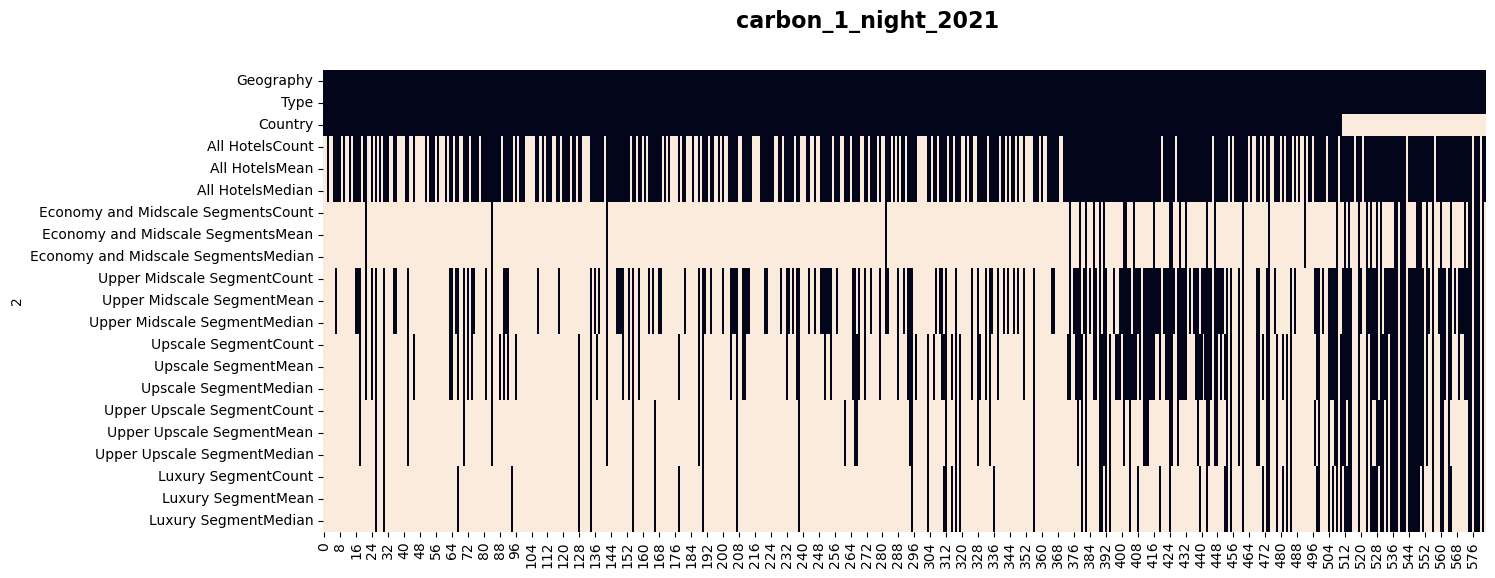

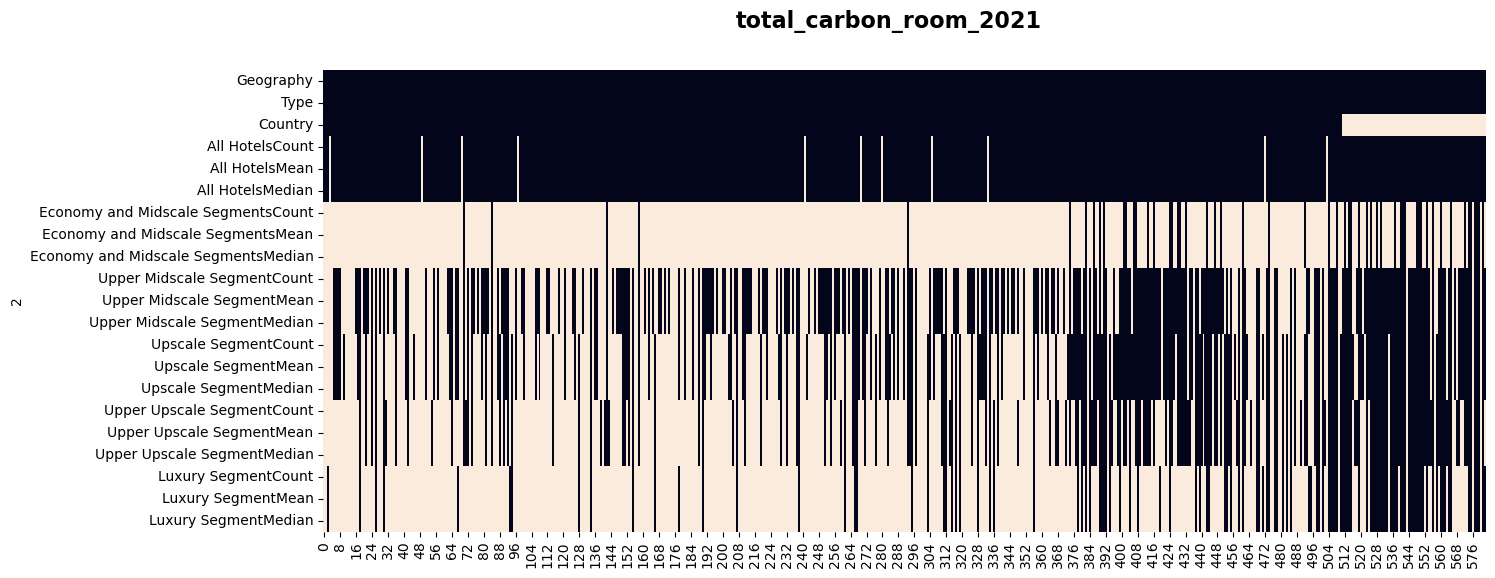

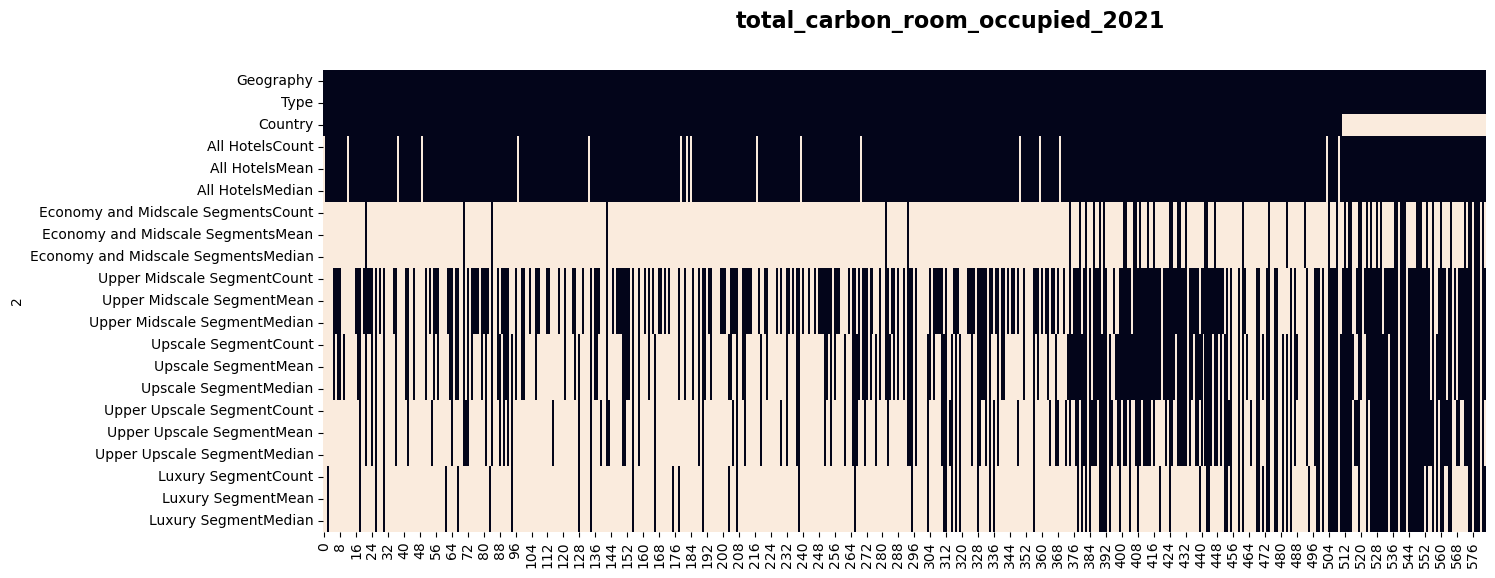

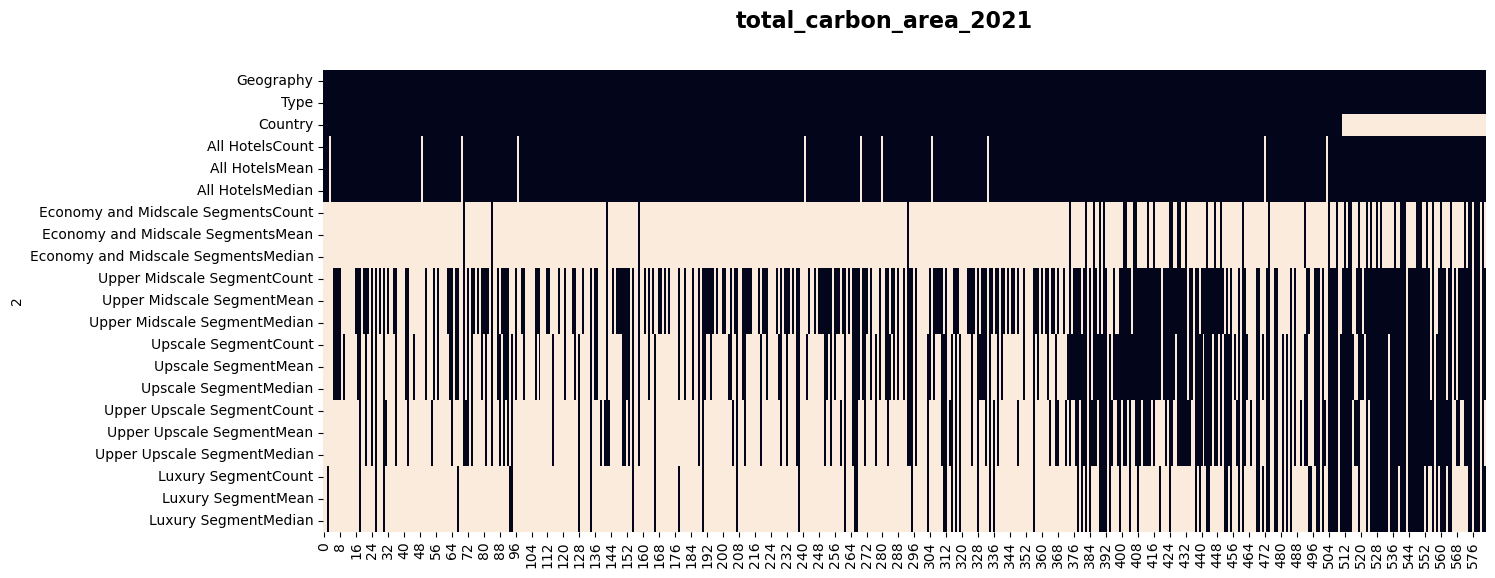

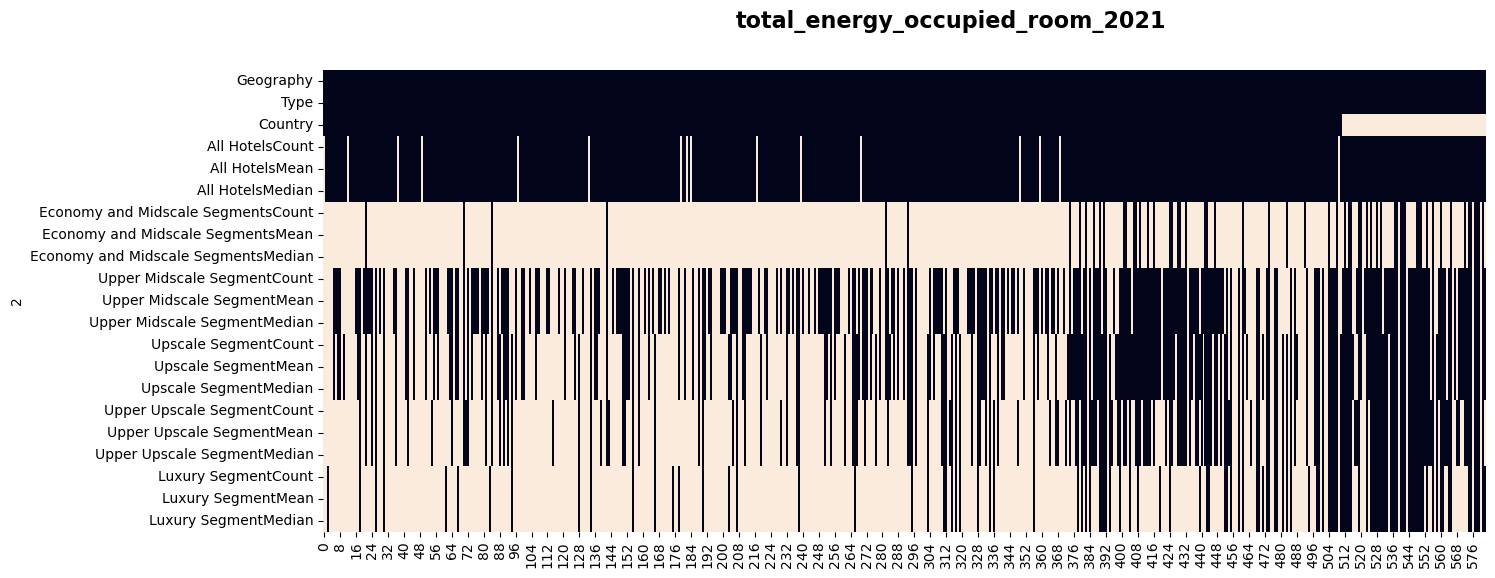

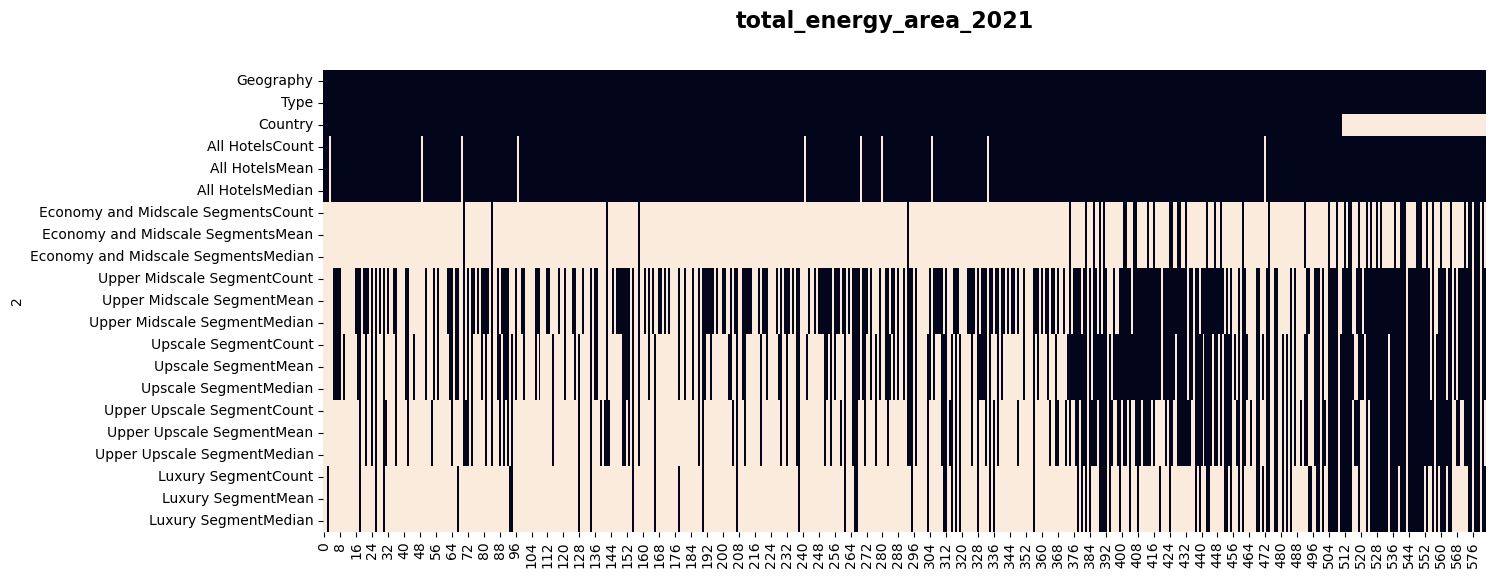

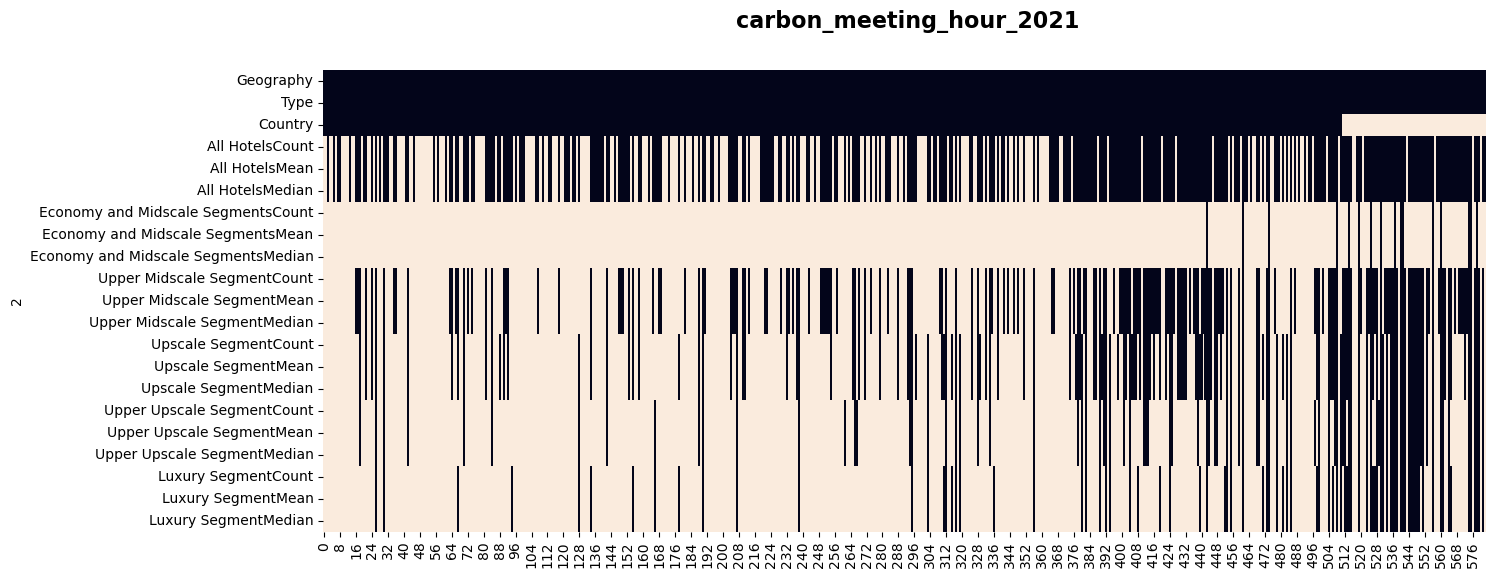

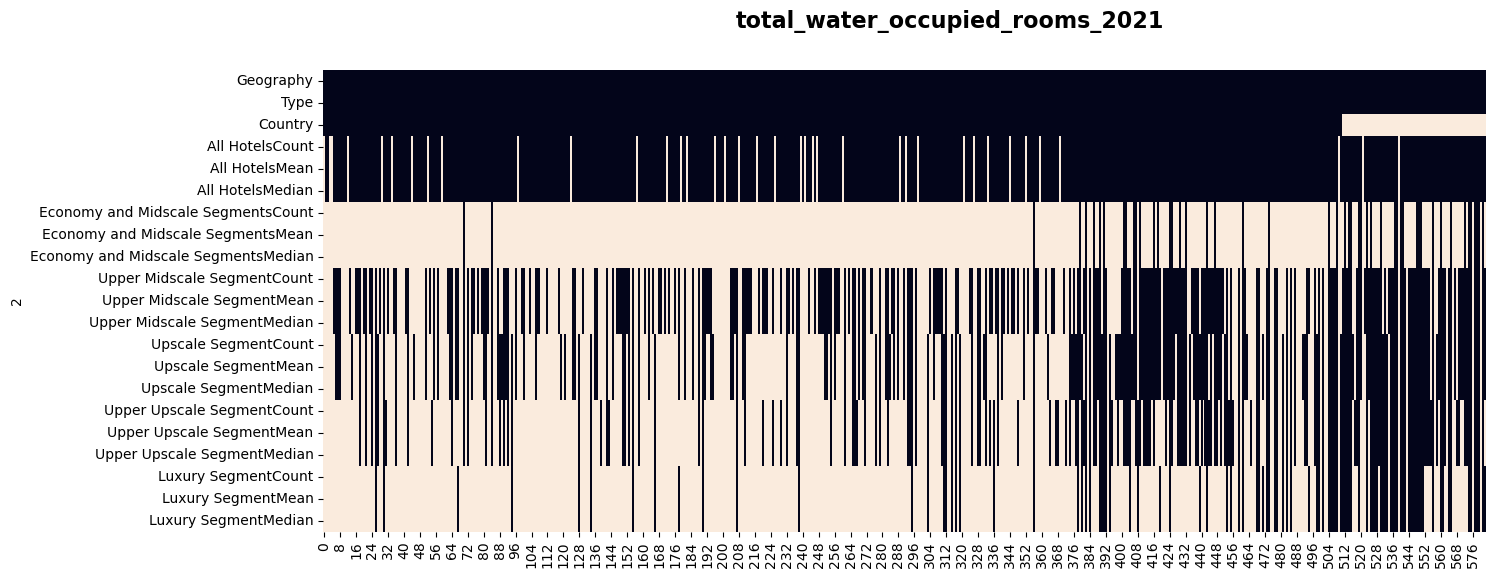

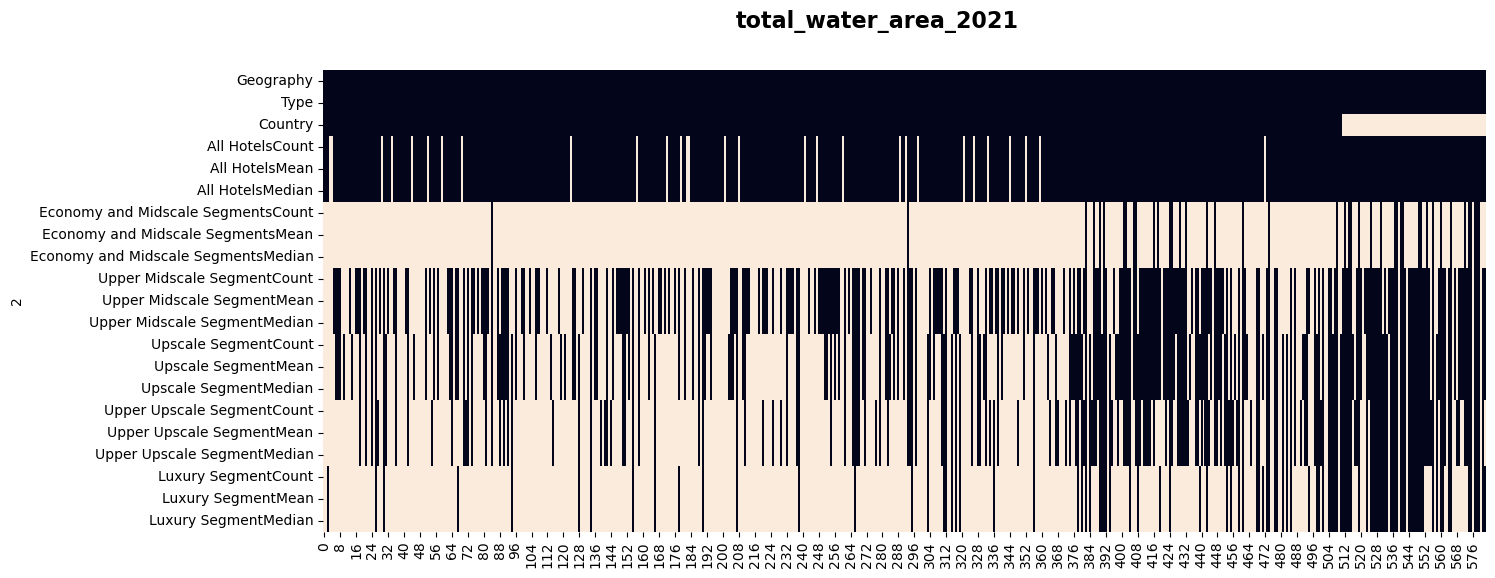

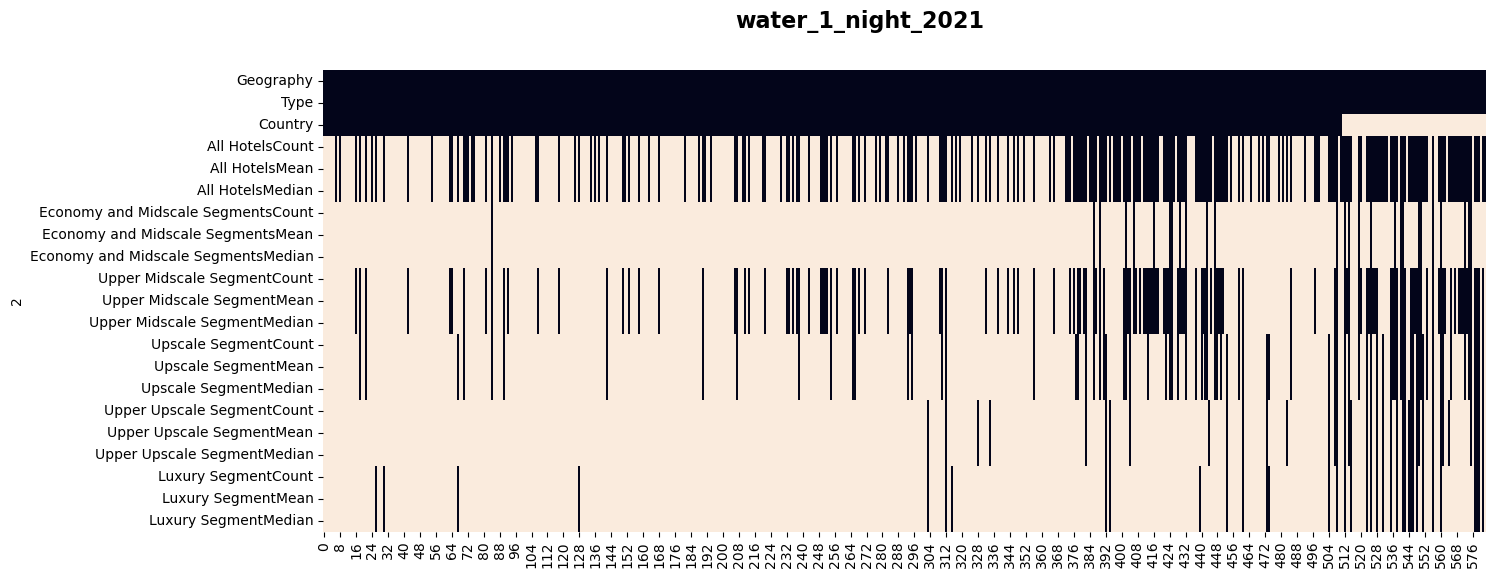

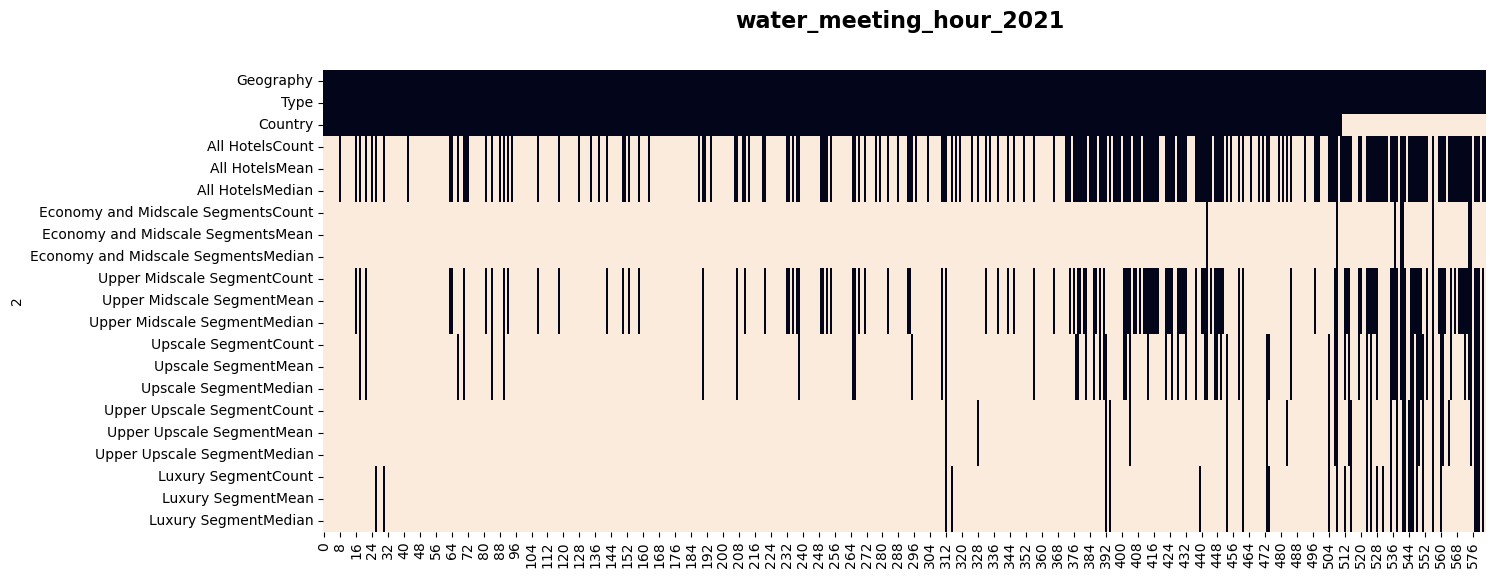

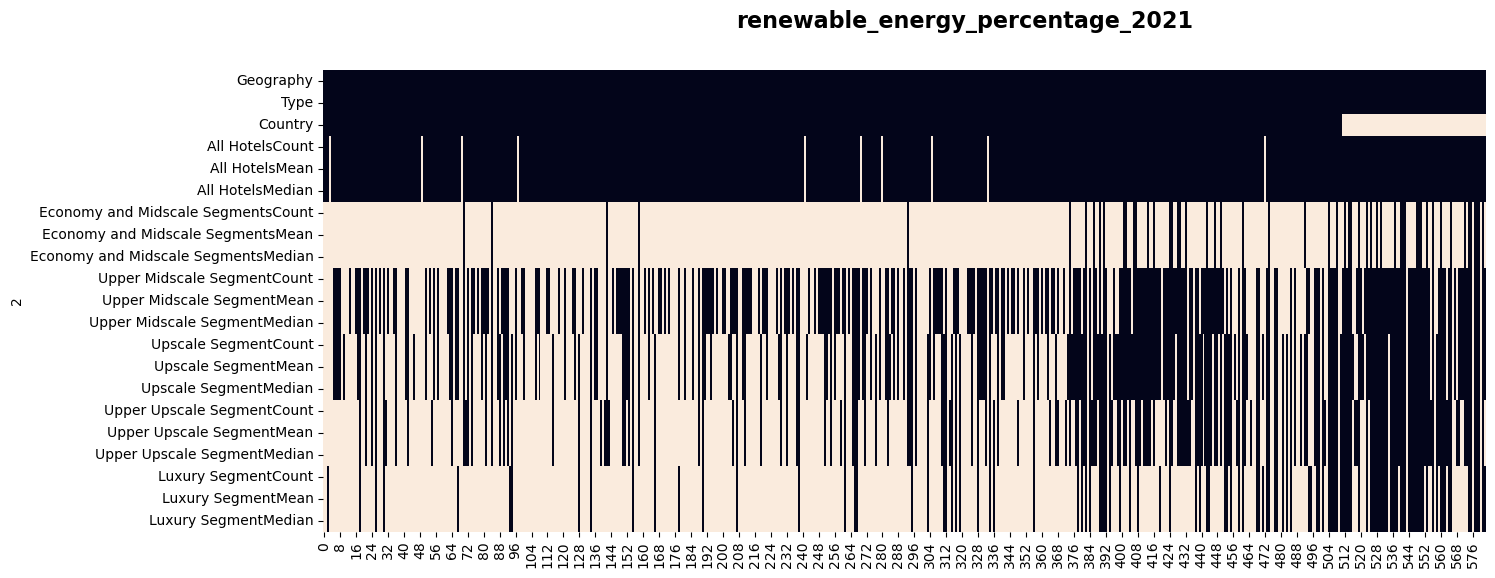

In [8]:
#check for missing values

df_names=['carbon_1_night_2021','total_carbon_room_2021', 'total_carbon_room_occupied_2021', 'total_carbon_area_2021', 
          'total_energy_occupied_room_2021','total_energy_area_2021', 'carbon_meeting_hour_2021',
          'total_water_occupied_rooms_2021', 'total_water_area_2021', 'water_1_night_2021', 'water_meeting_hour_2021', 'renewable_energy_percentage_2021']

#plot null heatmap
for df, name in zip(list(clean_df.values()), df_names):
    fig,ax = plt.subplots(1, 1, figsize=(15,6))
    sns.heatmap(df.isnull().transpose(),
               cbar_kws={'label':'missing data'},
               cbar = None)
    fig.text(0.4, 0.95, name, fontsize=16, fontweight='bold')
    



In [9]:
#checking non-null counts for all columns
carbon_1_night_2021_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Geography                            583 non-null    object
 1   Type                                 583 non-null    object
 2   Country                              511 non-null    object
 3   All HotelsCount                      412 non-null    object
 4   All HotelsMean                       412 non-null    object
 5   All HotelsMedian                     412 non-null    object
 6   Economy and Midscale SegmentsCount   50 non-null     object
 7   Economy and Midscale SegmentsMean    50 non-null     object
 8   Economy and Midscale SegmentsMedian  50 non-null     object
 9   Upper Midscale SegmentCount          236 non-null    object
 10  Upper Midscale SegmentMean           236 non-null    object
 11  Upper Midscale SegmentMedian         236 non-

## <font color='green'>Observations</font>

* Note that because we expect **`All HotelsCount`,`All HotelsMean` and `All HotelsMedian` to be a complete data** for meaningful analysis, as no data in this column represents zero entry for the given country at all. Let's drop the rows with missing values in these 2 columns.

* We would like to analyse how the emissions are classified under different hotel segments, however the data is not complete. We will keep this for now and see how far the analysis can take us.

In [10]:
#drop missing values in All HotelsCount, All HotelsMean and All HotelsMedian

for key, df in clean_df.items():
    clean_df[key] = df.dropna(subset=['All HotelsCount','All HotelsMean', 'All HotelsMedian'])
    #unpack dictionary
    globals()[key] = df

#check null rows are dropped
carbon_1_night_2021_clean[['All HotelsCount','All HotelsMean', 'All HotelsMedian']].isnull().value_counts()

All HotelsCount  All HotelsMean  All HotelsMedian
False            False           False               412
True             True            True                171
dtype: int64

## <font color='green'>Data cleaning - dropping granular geographic info</font>

From the null heatmap, we see that there are missing `Country` values between at the tail end, let's check what they are.

In [11]:
carbon_1_night_2021_clean.iloc[:,0:4].tail(20)

2                                            Geography          Type Country  \
563  Seasonally humid mixed (deciduous and evergree...  Climate Zone     NaN   
564  Seasonally humid, predominantly deciduous forests  Climate Zone     NaN   
565    Semi-deserts and deserts of continental climate  Climate Zone     NaN   
566        Semi-deserts of extreme continental climate  Climate Zone     NaN   
567  Shrub and semi-shrub semi-deserts and deserts ...  Climate Zone     NaN   
568  Shrub and semi-shrub semi-deserts of continent...  Climate Zone     NaN   
569       Shrub-forest-meadow of mediterranean climate  Climate Zone     NaN   
570  Small-leafed and coniferous wooded steppes of ...  Climate Zone     NaN   
571  Steppes and shrub of moderate continental climate  Climate Zone     NaN   
572          Steppes of moderately continental climate  Climate Zone     NaN   
573           Subarctic With Cool Summer, Wet All Year  Climate Zone     NaN   
574  Subtropical prairies (humid steppes and wooded...  Climate Zone     NaN   
575  Temperate prairies (humid steppes and wooded s...  Climate Zone     NaN   
576                                           Tropical  Climate Zone     NaN   
577                                   Tropical Monsoon  Climate Zone     NaN   
578                                       Tropical Wet  Climate Zone     NaN   
579                               Tropical Wet and Dry  Climate Zone     NaN   
580       Western oceanic coniferous and mixed forests  Climate Zone     NaN   
581  Western oceanic mixed sclerophyll forests and ...  Climate Zone     NaN   
582  Western oceanic semi-deserts and deserts with ...  Climate Zone     NaN   

2   All HotelsCount  
563              10  
564              63  
565             108  
566              12  
567              29  
568              13  
569              43  
570              18  
571              29  
572             105  
573              33  
574             421  
575             252  
576             NaN  
577             211  
578             304  
579             309  
580             NaN  
581             330  
582              15

In [12]:
carbon_1_night_2021_clean['Type'].value_counts()

Metro Area      374
Region           80
Climate Zone     72
Country          57
Name: Type, dtype: int64

## <font color='green'>Observations<font/>
    
If we look up the `Type` column, we will notice that there are `Metro Area`, `Region`, `Country`,`Climate Zone` where countries may have been aggregated according to type, and because `Climate Zone` is a land-climate description there is no specific country listing, giving us the null values in `Country` column.  Since we are interested in analysing per country data, and do not require the granular information from `Metro Area`, `Region`,`Climate Zone`, we will drop these rows next.
    
As a result, `Country` would become a replica of both `Geography` and `Type` after dropping columns, we can drop both `Geography` and `Type` as well.

In [13]:
drop_rows = ['Metro Area', 'Region', 'Climate Zone']

for key, df in clean_df.items():
#drop rows using index position after boolean filter
    df.drop(df[df['Type'].isin(drop_rows)].index, inplace=True)
#drop Geography and Type columns as no longer required
    df.drop(['Geography', 'Type'], axis=1, inplace=True)
    globals()[key] = df

#check df make sure columns are dropped
carbon_1_night_2021_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 455 to 510
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Country                              38 non-null     object
 1   All HotelsCount                      38 non-null     object
 2   All HotelsMean                       38 non-null     object
 3   All HotelsMedian                     38 non-null     object
 4   Economy and Midscale SegmentsCount   4 non-null      object
 5   Economy and Midscale SegmentsMean    4 non-null      object
 6   Economy and Midscale SegmentsMedian  4 non-null      object
 7   Upper Midscale SegmentCount          19 non-null     object
 8   Upper Midscale SegmentMean           19 non-null     object
 9   Upper Midscale SegmentMedian         19 non-null     object
 10  Upscale SegmentCount                 20 non-null     object
 11  Upscale SegmentMean                  20 non-

## <font color = 'green'>Observations<font/>
There are only **16 columns left**.
Let's have a look at the null heatmap after downsizing the dataset

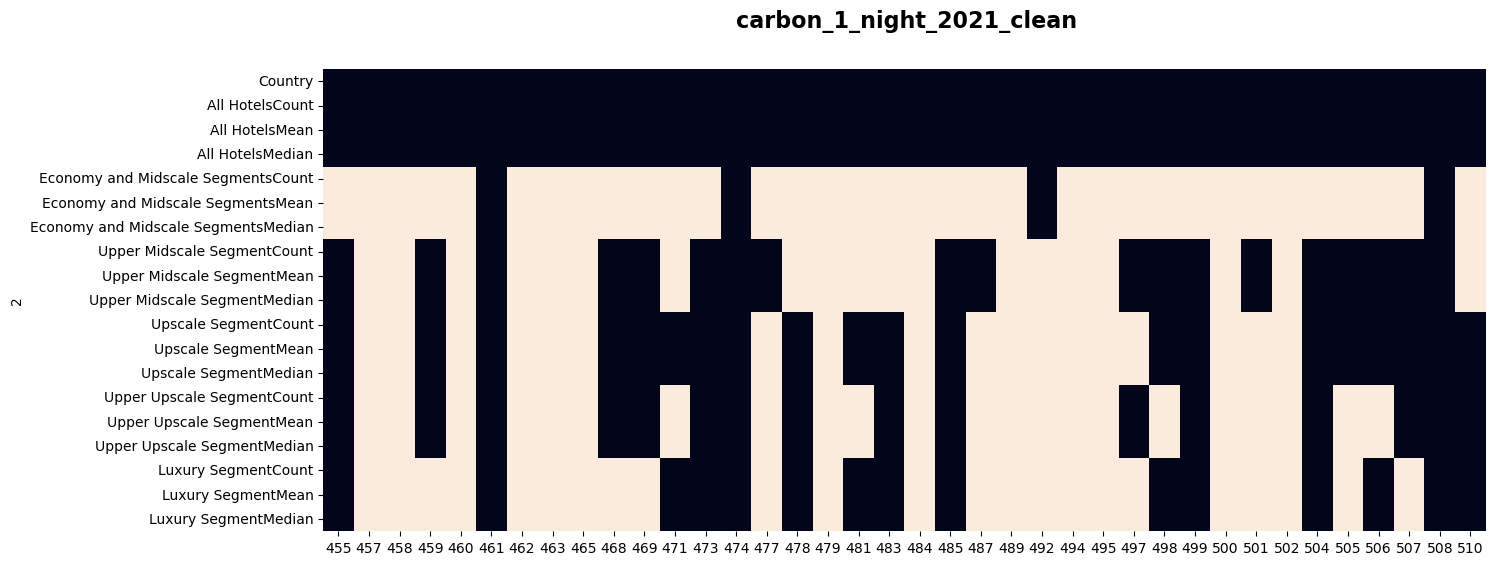

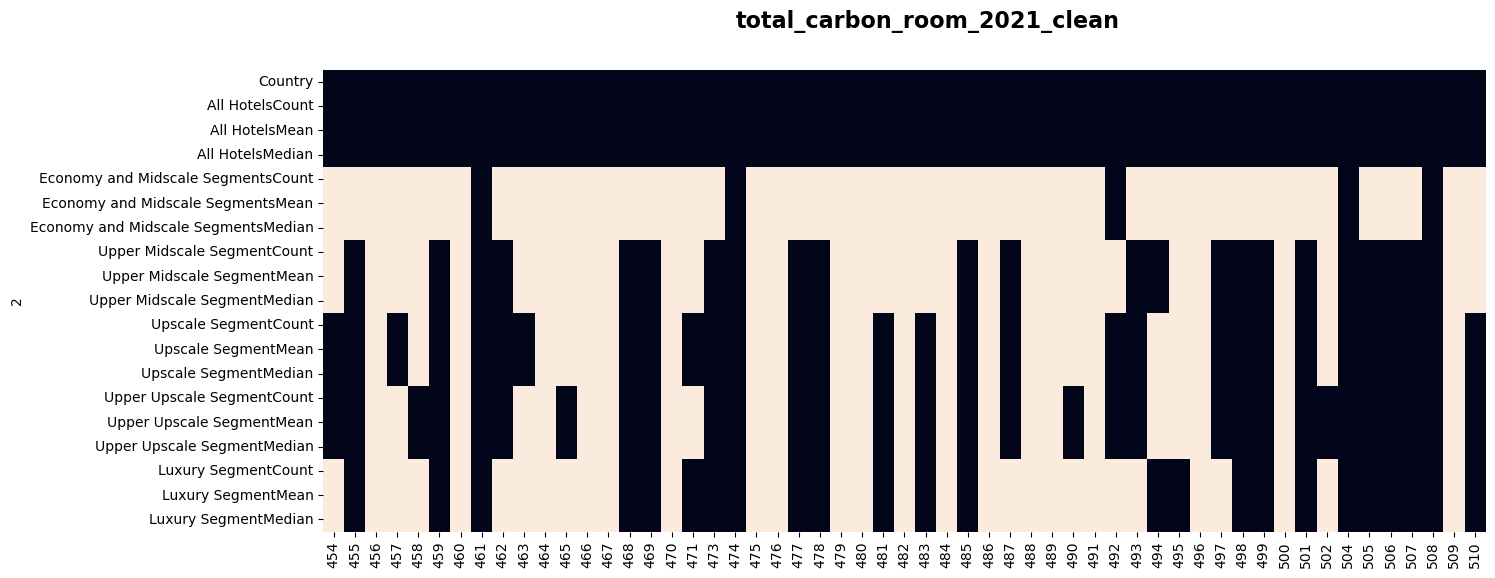

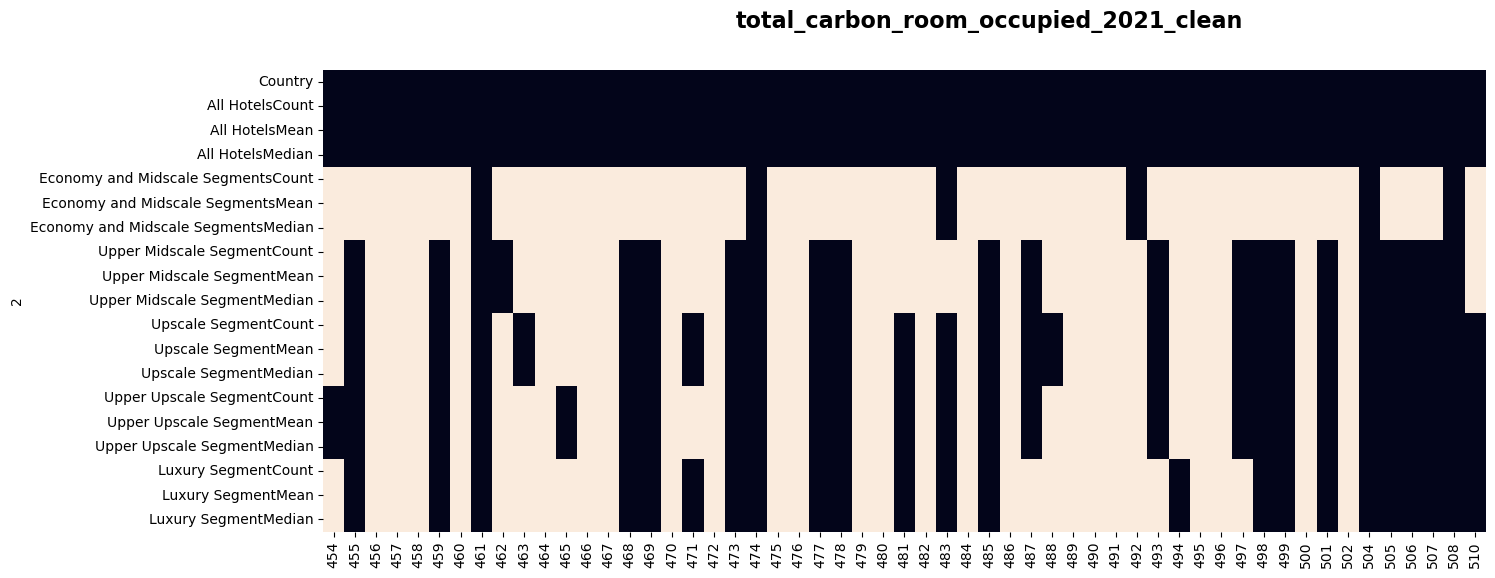

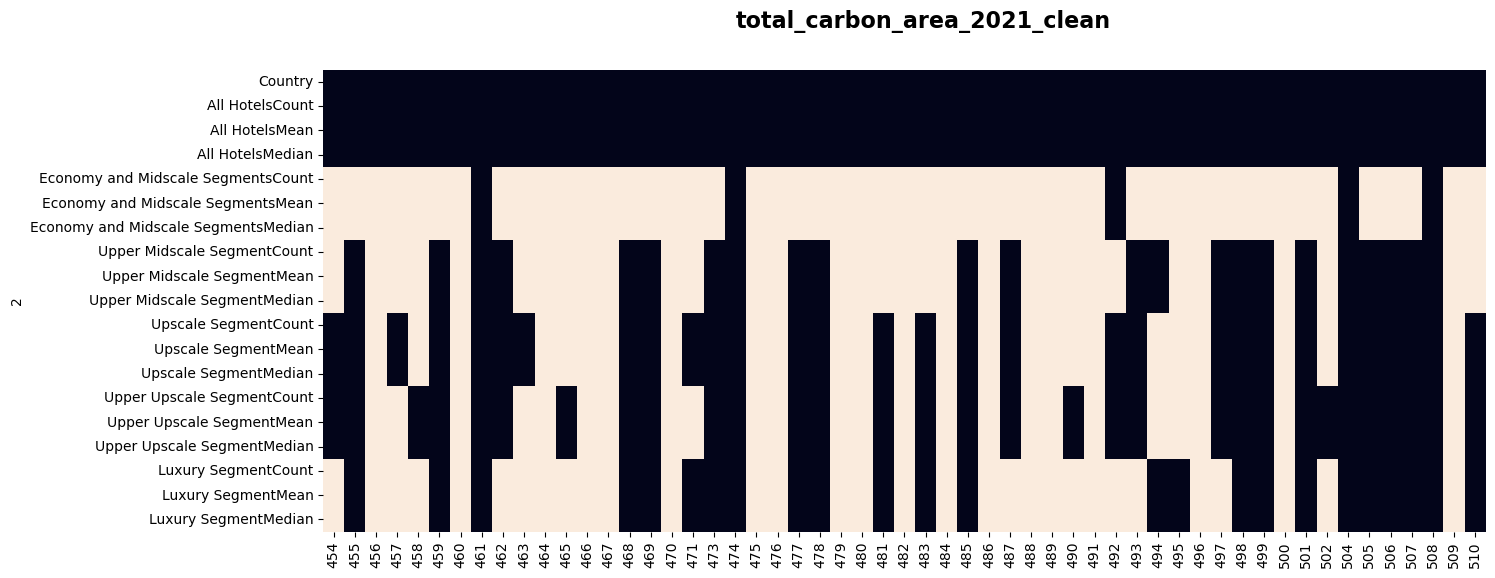

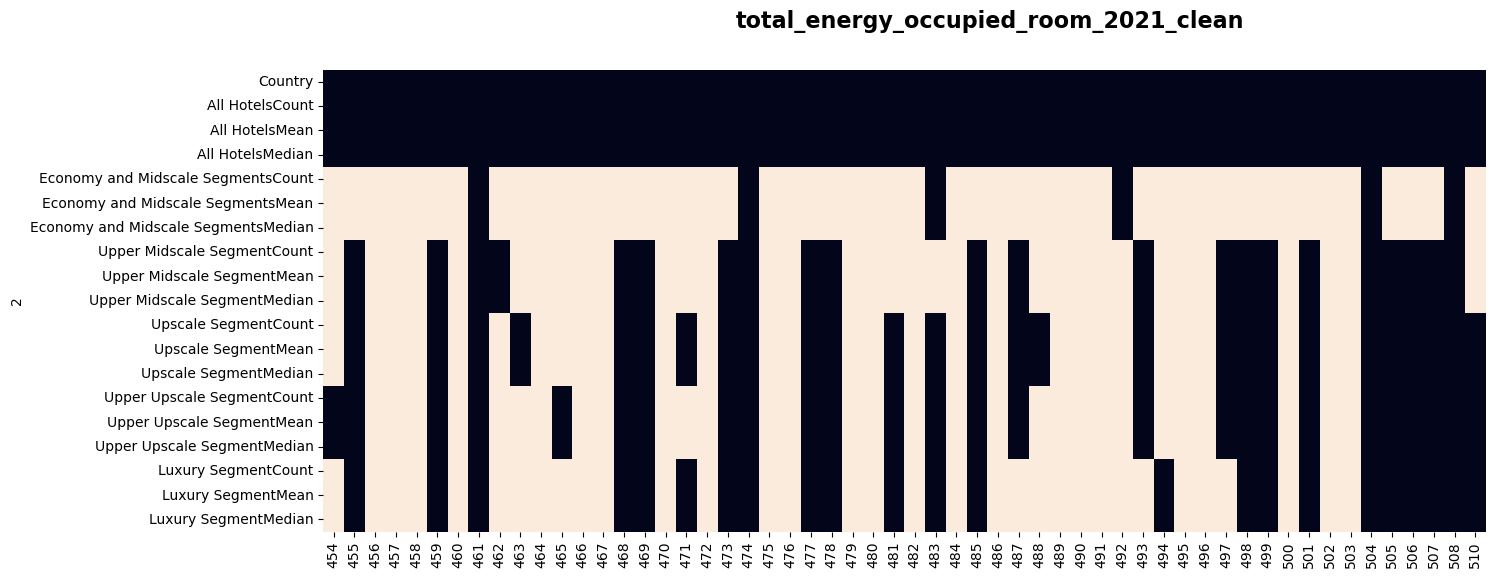

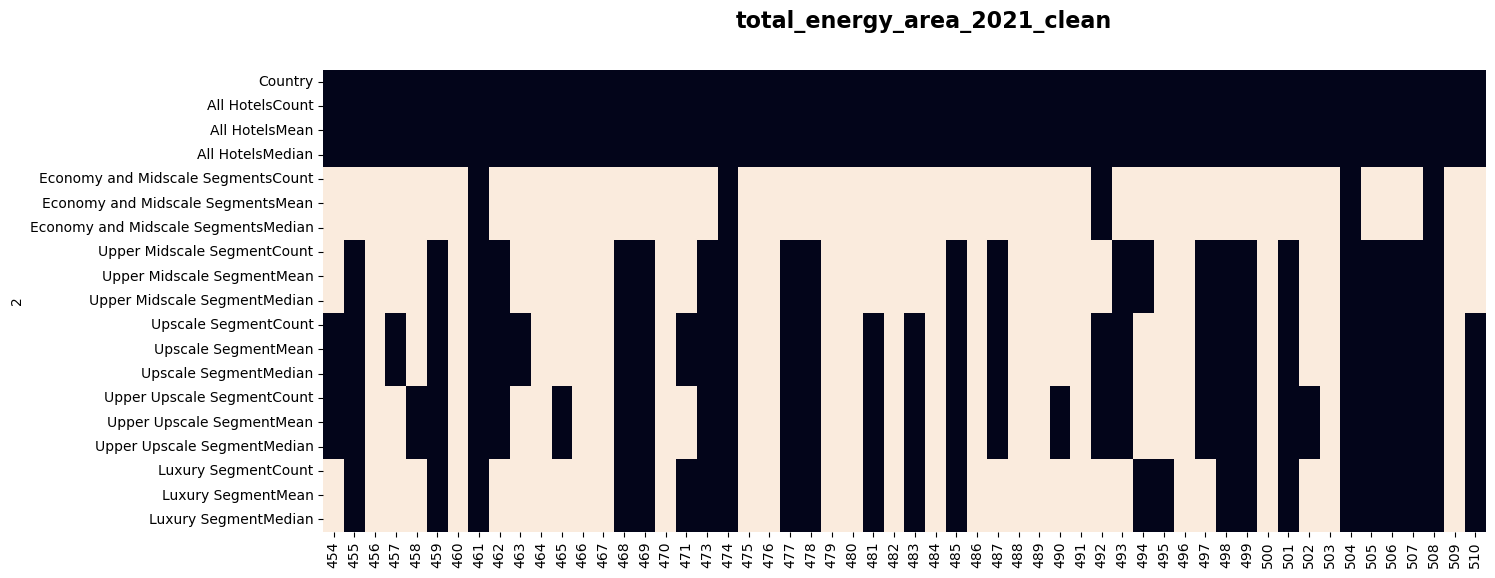

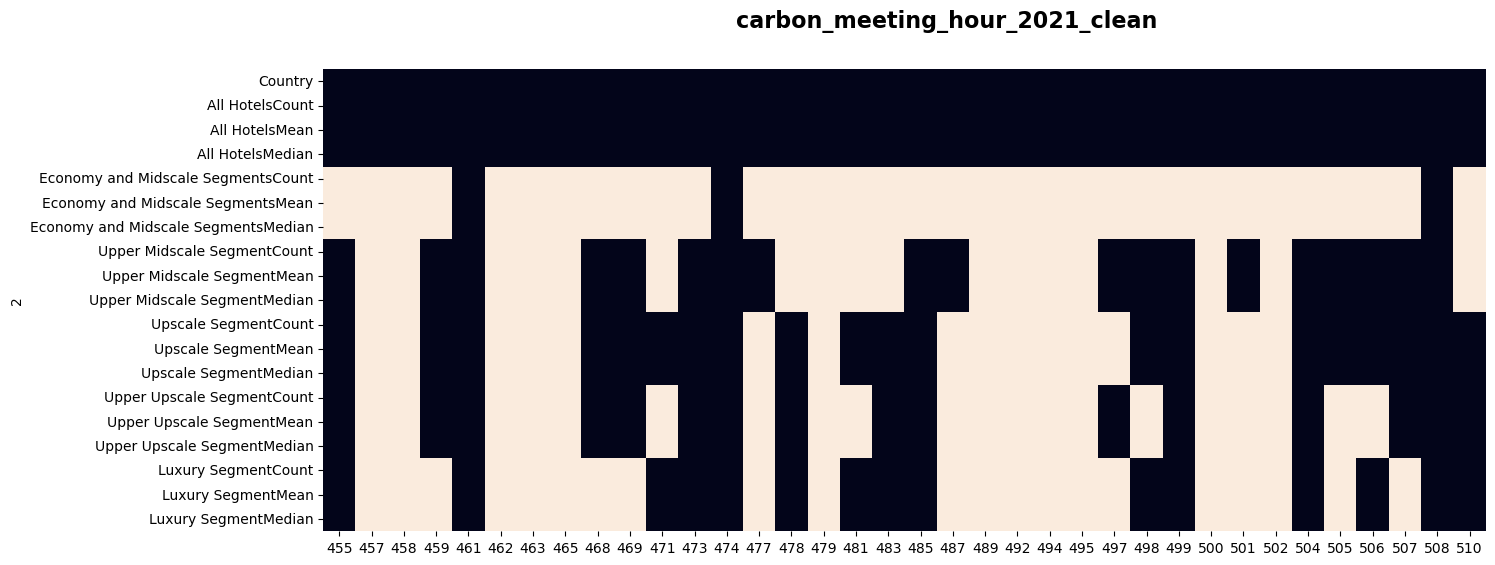

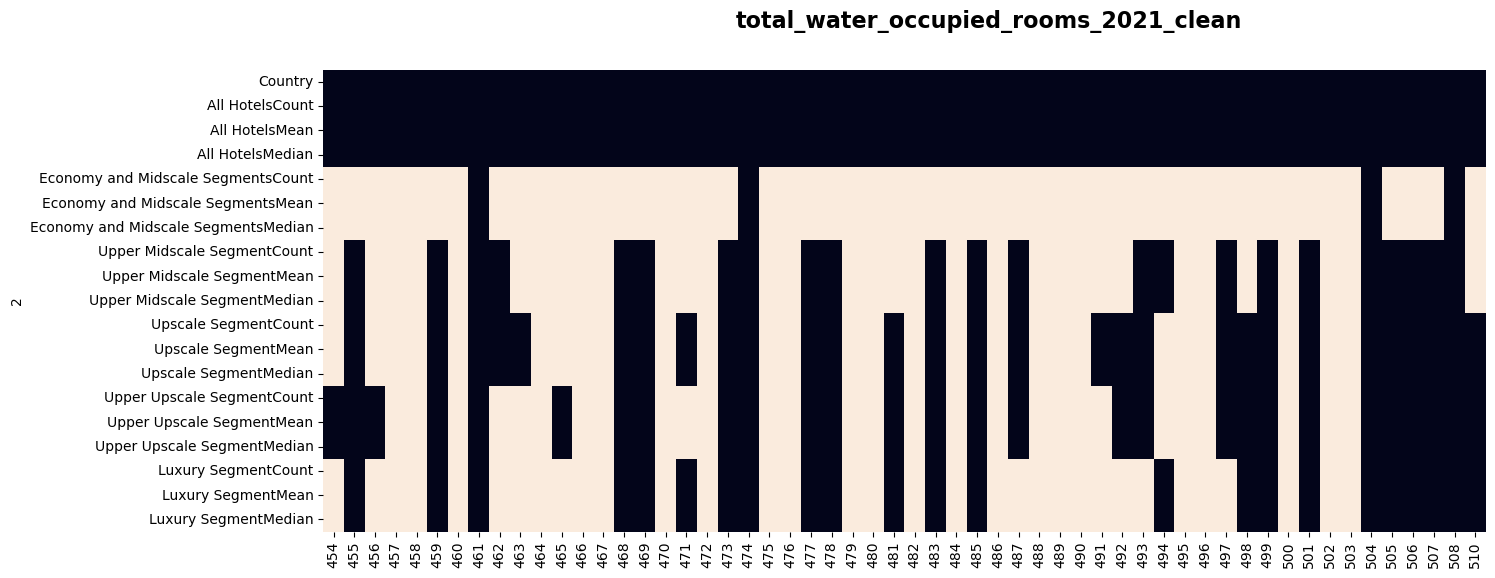

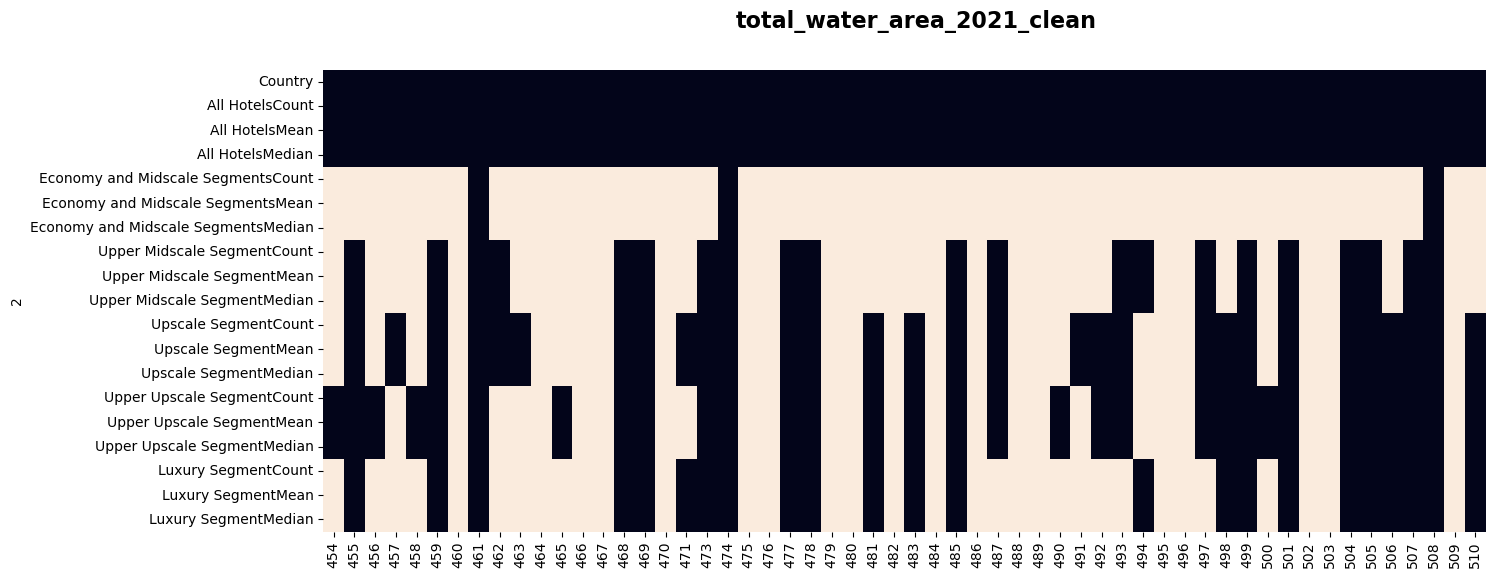

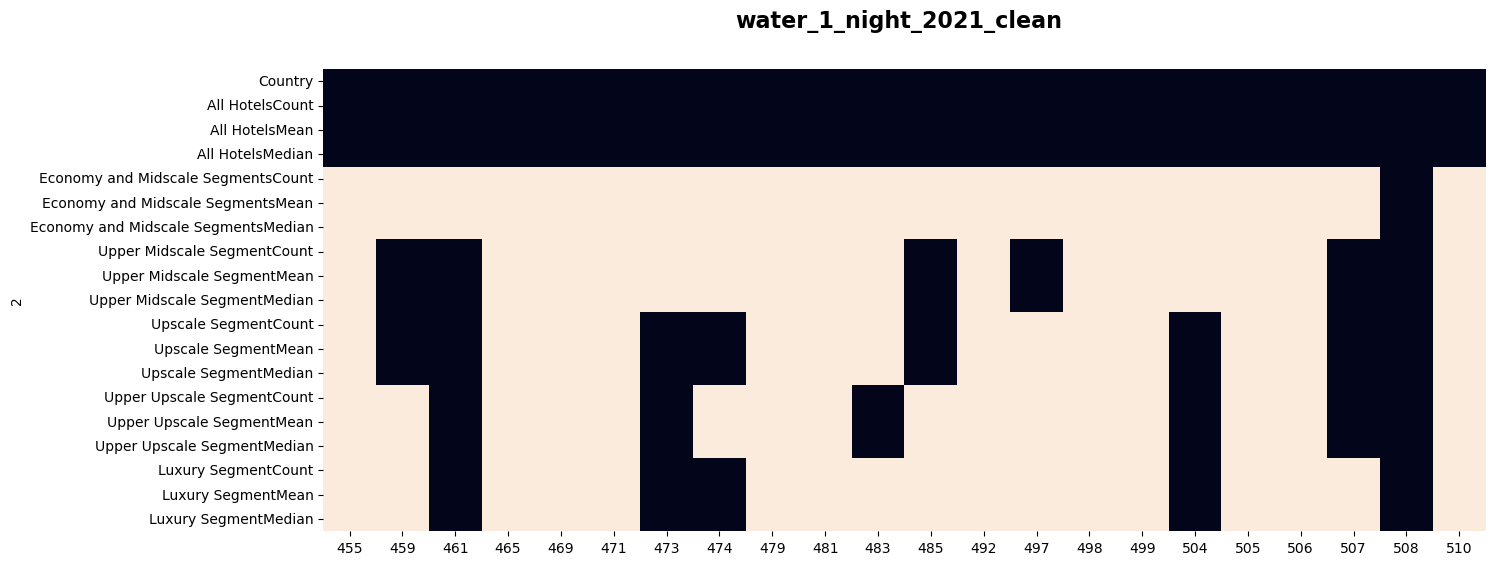

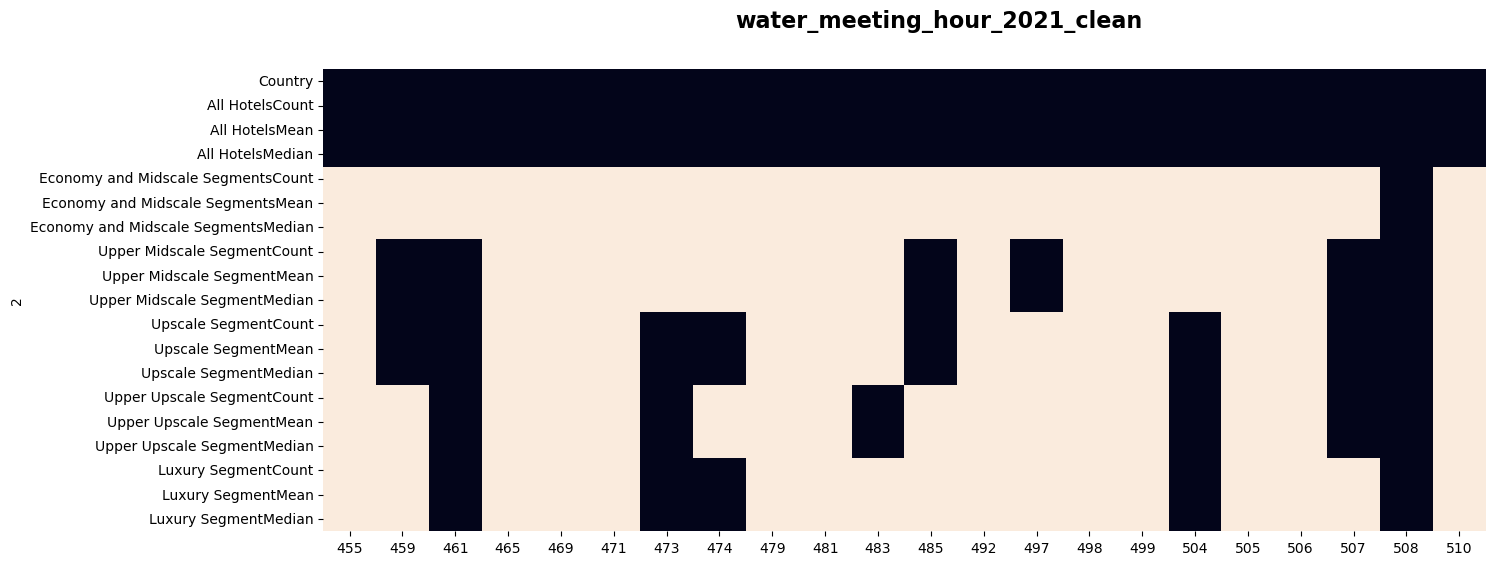

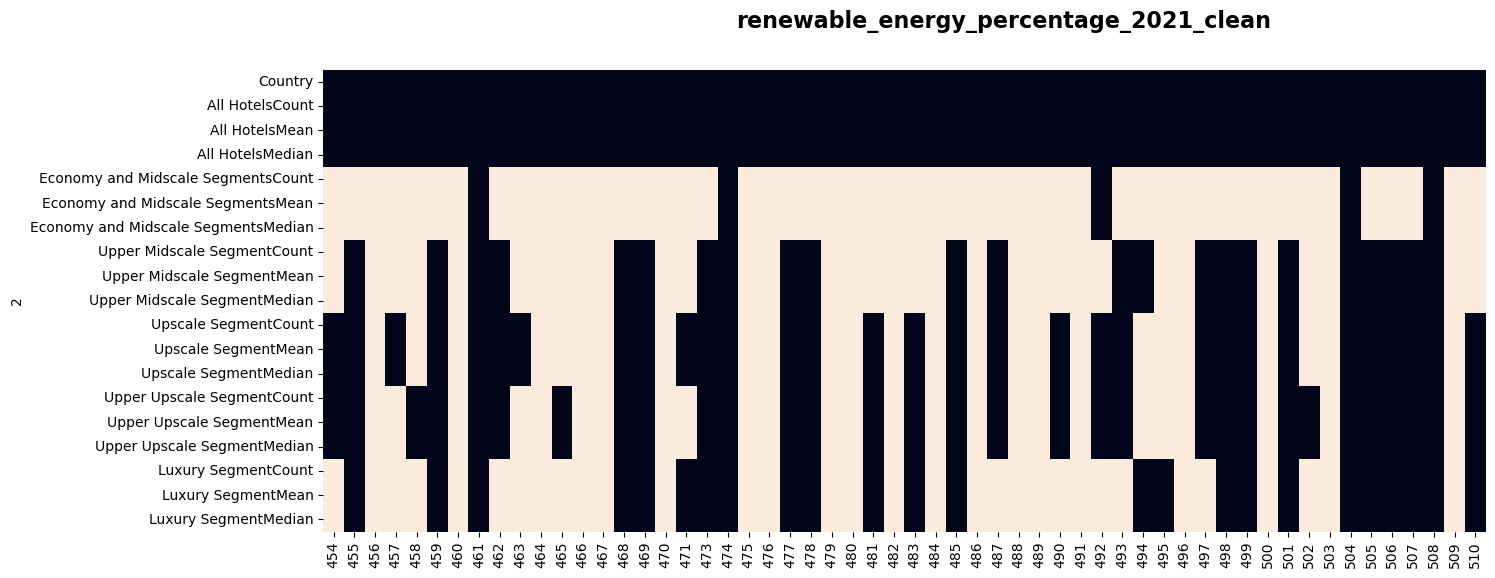

In [14]:
#plot null heatmap
for name, df in clean_df.items():
    fig,ax = plt.subplots(1, 1, figsize=(15,6))
    sns.heatmap(df.isnull().transpose(),
               cbar_kws={'label':'missing data'},
               cbar = None)
    fig.text(0.4, 0.95, name, fontsize=16, fontweight='bold')


Our key columns `Country`,`All HotelsCount`,`All HotelsMean` and `All HotelsMedian` are completed, we will proceed to fill the rest of the null values with 0.

## <font color='green'>Data cleaning - fill null values with 0<font/>

In [15]:
for df in list(clean_df.values()):
    df.fillna(0, inplace=True)

#check if null values filled
carbon_1_night_2021_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 455 to 510
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              38 non-null     object 
 1   All HotelsCount                      38 non-null     int64  
 2   All HotelsMean                       38 non-null     float64
 3   All HotelsMedian                     38 non-null     float64
 4   Economy and Midscale SegmentsCount   38 non-null     int64  
 5   Economy and Midscale SegmentsMean    38 non-null     float64
 6   Economy and Midscale SegmentsMedian  38 non-null     float64
 7   Upper Midscale SegmentCount          38 non-null     int64  
 8   Upper Midscale SegmentMean           38 non-null     float64
 9   Upper Midscale SegmentMedian         38 non-null     float64
 10  Upscale SegmentCount                 38 non-null     int64  
 11  Upscale SegmentMean            

## <font color='green'>Data Check - Mean and Median values</font>

As we do not have the original records of each country, we should practise caution when using the `mean` values by checking the `median` to see if there is huge difference. As this may represent a *skewed distribution(extreme high or low values skewing the mean value)*, and that **`median` may be a better gauge of an average value.**

In [16]:
#create new column for mean median percentage difference
carbon_1_night_2021_clean['mean_median_diff'] = ((carbon_1_night_2021_clean['All HotelsMean'] - 
                                                 carbon_1_night_2021_clean['All HotelsMedian'])/
                                                ((carbon_1_night_2021_clean['All HotelsMean'] + carbon_1_night_2021_clean['All HotelsMedian'])/2))*100
#round to nearest whole number
carbon_1_night_2021_clean['mean_median_diff'] = carbon_1_night_2021_clean['mean_median_diff'].astype(int)

#average of mean_media_diff
mean_median_diff_avg = carbon_1_night_2021_clean['mean_median_diff'].mean()

#filter out countries that are more than average
mean_median_abv_avg = carbon_1_night_2021_clean[carbon_1_night_2021_clean['mean_median_diff'] > mean_median_diff_avg][['Country','mean_median_diff', 'All HotelsMedian']]
mean_median_abv_avg

2               Country  mean_median_diff  All HotelsMedian
458              Brazil                60          8.704875
459              Canada                59          7.416750
463          Costa Rica                43          4.709585
469             Germany                22         13.192492
471    Hong Kong, China                29         51.469289
474           Indonesia                32         62.701367
477               Italy                58         14.284331
478               Japan                26         39.041812
483            Malaysia                22         61.463410
485              Mexico                21         19.297370
487         Netherlands                29         14.792256
489                Oman                23         90.269787
494            Portugal                22         18.975502
497  Russian Federation                23         24.217093
501               Spain                73          6.959741
504            Thailand                21         43.386864
505              Turkey                41         32.106841
510             Vietnam                24         38.493243

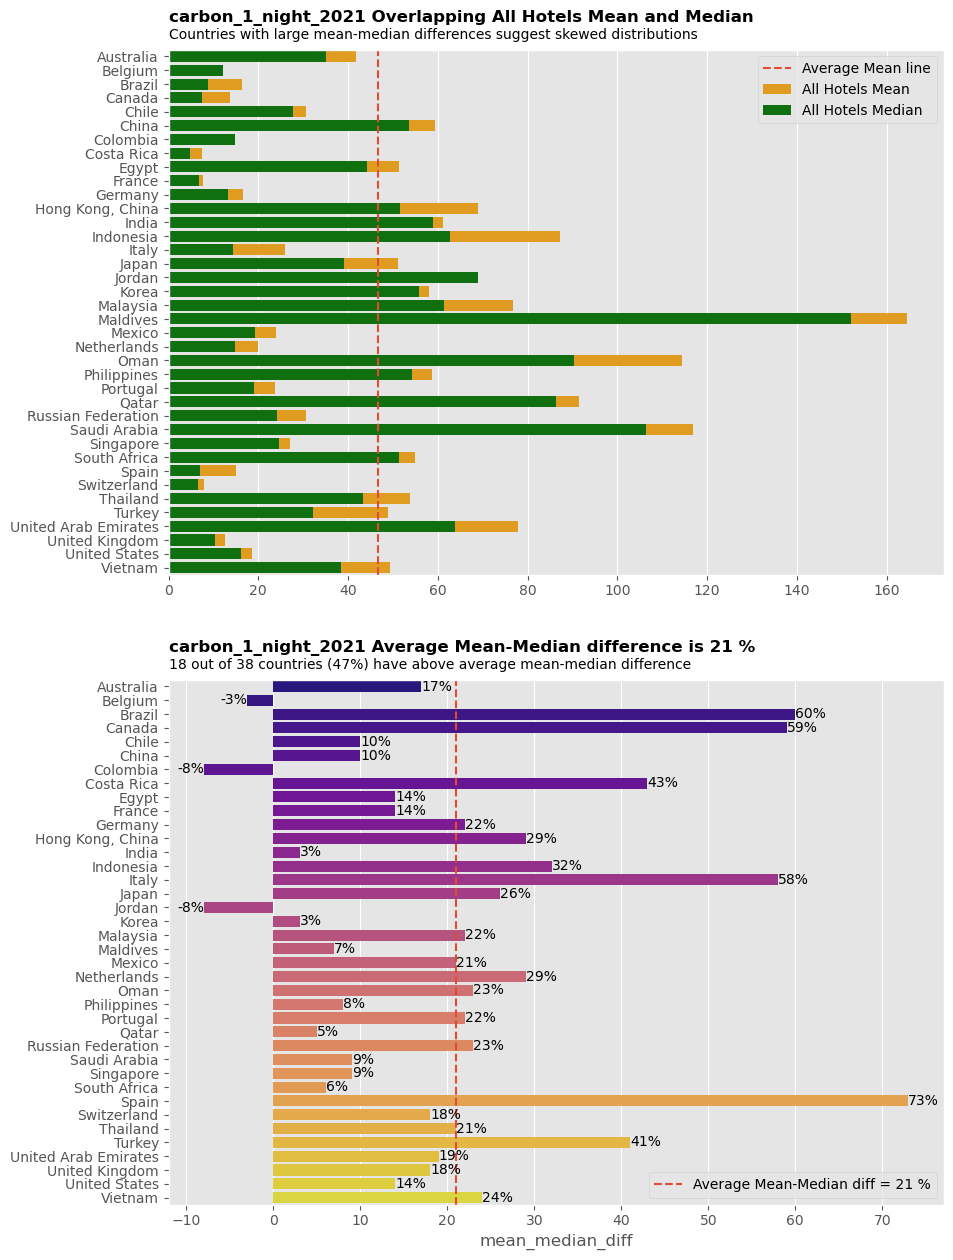

In [17]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 15))

#plot 1
plt.subplot(2,1,1)

mean_plot = sns.barplot(data=carbon_1_night_2021_clean, y='Country', x='All HotelsMean', color='orange', label='All Hotels Mean')
median_plot = sns.barplot(data=carbon_1_night_2021_clean, y='Country', x='All HotelsMedian', color='green', label='All Hotels Median')
plt.ylabel('')
plt.xlabel('')

#title
plt.text(x=0, y=-2.5, s= 'carbon_1_night_2021 Overlapping All Hotels Mean and Median', size=12, weight='bold')

#subtitle
plt.text(x=0, y=-1.3, s='Countries with large mean-median differences suggest skewed distributions')

#add average line of mean values
average_mean = carbon_1_night_2021_clean['All HotelsMean'].mean()
plt.axvline(x=average_mean, ls='--', label='Average Mean line')
plt.legend()

#plot 2
plt.subplot(2,1,2)

plot2 = sns.barplot(data=carbon_1_night_2021_clean, y='Country', x='mean_median_diff', palette='plasma')
plt.ylabel('')
plt.axvline(x=round(mean_median_diff_avg), ls='--', label=f'Average Mean-Median diff = {round(mean_median_diff_avg)} %')

#title
plt.text(x=-12, y=-2.5, s= f'carbon_1_night_2021 Average Mean-Median difference is {round(mean_median_diff_avg)} %', size=12, weight='bold')

#subtitle
plt.text(x=-12, y=-1.3, s=f'{len(mean_median_abv_avg)} out of 38 countries ({round((len(mean_median_abv_avg)/38)*100)}%) have above average mean-median difference')

#bar labels
plt.bar_label(plot2.containers[0], fmt='%.0f%%')

plt.legend()



## <font color='green'>Observations</font>

* We see that for `carbon_1_night_2021_clean` dataframe, 47% of the countries have skewed distribution where mean-median difference is more than average. This is almost half of the dataset, we shall inspect the rest of the dataframes to see if this percentage difference is consistent.


In [18]:
#create function to check above average mean-median difference
def check_mean_median_diff(dataframe):

    #create new column for mean median percentage difference
    dataframe['mean_median_diff'] = ((dataframe['All HotelsMean'] - 
                                          dataframe['All HotelsMedian'])/
                                          ((dataframe['All HotelsMean'] + dataframe['All HotelsMedian'])/2))*100
    #round to nearest whole number
    dataframe['mean_median_diff'] = dataframe['mean_median_diff'].astype(int)

    #average of mean_media_diff
    df_mean_median_diff_avg = dataframe['mean_median_diff'].mean()

    #filter out countries that are more than average
    df_mean_median_abv_avg = dataframe[dataframe['mean_median_diff'] > df_mean_median_diff_avg][['Country','mean_median_diff', 'All HotelsMedian']]
    
    abv_avg_pct = round((len(df_mean_median_abv_avg))/(len(dataframe['Country']))*100)
    
#     #print mean_media_diff
#     print(f'''
#     {dataframe_name}: Average Mean-Median difference is {round(df_mean_median_diff_avg)} %
#     {len(df_mean_median_abv_avg)} out of {len(df_all_hotels['Country'])} countries ({abv_avg_pct}%) 
#     have above average mean-median difference''')
    
    return abv_avg_pct
 

Text(0, -1.2, 'With the exception of renewable_energy_percentage as there are no median data')

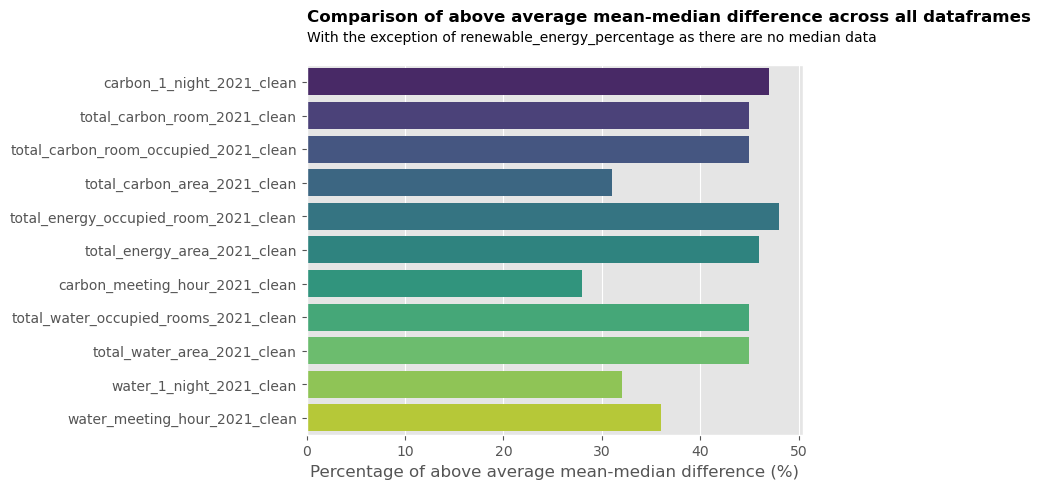

In [19]:
# #check mean-median diff for all dfs except renewable_energy_percentage as there is median column is all 0.

comparison_dict = {}

for name, df in zip(list(clean_df.keys())[:-1], list(clean_df.values())[:-1]):
    comparison_dict[name] = check_mean_median_diff(df)

#plot comparison

keys = list(comparison_dict.keys())
vals = list(comparison_dict.values())
sns.barplot(x=vals, y=keys, orient='h', palette='viridis')
plt.xlabel('Percentage of above average mean-median difference (%)')
plt.text(0, -1.8, 'Comparison of above average mean-median difference across all dataframes', size=12, weight='bold')
plt.text(0, -1.2, 'With the exception of renewable_energy_percentage as there are no median data')



## <font color='green'>Observations</font>
* All 11 (out of 12) dataframes have mean-median differences above average of their individual mean-median difference. This suggests that most data within each dataframes have skewed distribution, where mean is larger than median, and `median` will be a better metric to use to calculate averages.
* `Renewable_energy_percentage` does not have any median data, we will use `mean` to calculate its average.

_______

## <font color='green'>Carbon emission - Highest and lowest emitters - All Hotels 2019</font>

Let's inspect the clean data and see which country(All Hotels) is the highest and lowest emitter in each measure category, using `median` as the benchmark for first 11 measure categories and `mean` for `renewable_energy_percentage`. As a reminder, the 4 carbon emission measures are:

* Carbon footprint per 1 night stay
* Carbon footprint per room in 1 calendar year
* Carbon footprint per occupied room in 1 calendar year
* Carbon footprint per area square metre
* Carbon footprint per meeting area square metre per hour

[Text(0, 0, '0.1205'),
 Text(0, 0, '0.1097'),
 Text(0, 0, '0.1031'),
 Text(0, 0, '0.0928'),
 Text(0, 0, '0.0877'),
 Text(0, 0, '0.0846'),
 Text(0, 0, '0.0832'),
 Text(0, 0, '0.0790'),
 Text(0, 0, '0.0779'),
 Text(0, 0, '0.0752'),
 Text(0, 0, '0.0699'),
 Text(0, 0, '0.0666'),
 Text(0, 0, '0.0631'),
 Text(0, 0, '0.0613'),
 Text(0, 0, '0.0593'),
 Text(0, 0, '0.0558'),
 Text(0, 0, '0.0499'),
 Text(0, 0, '0.0491'),
 Text(0, 0, '0.0484'),
 Text(0, 0, '0.0482'),
 Text(0, 0, '0.0480'),
 Text(0, 0, '0.0429'),
 Text(0, 0, '0.0361'),
 Text(0, 0, '0.0325'),
 Text(0, 0, '0.0299'),
 Text(0, 0, '0.0296'),
 Text(0, 0, '0.0279'),
 Text(0, 0, '0.0260'),
 Text(0, 0, '0.0254'),
 Text(0, 0, '0.0222'),
 Text(0, 0, '0.0205'),
 Text(0, 0, '0.0180'),
 Text(0, 0, '0.0136'),
 Text(0, 0, '0.0121'),
 Text(0, 0, '0.0112'),
 Text(0, 0, '0.0067')]

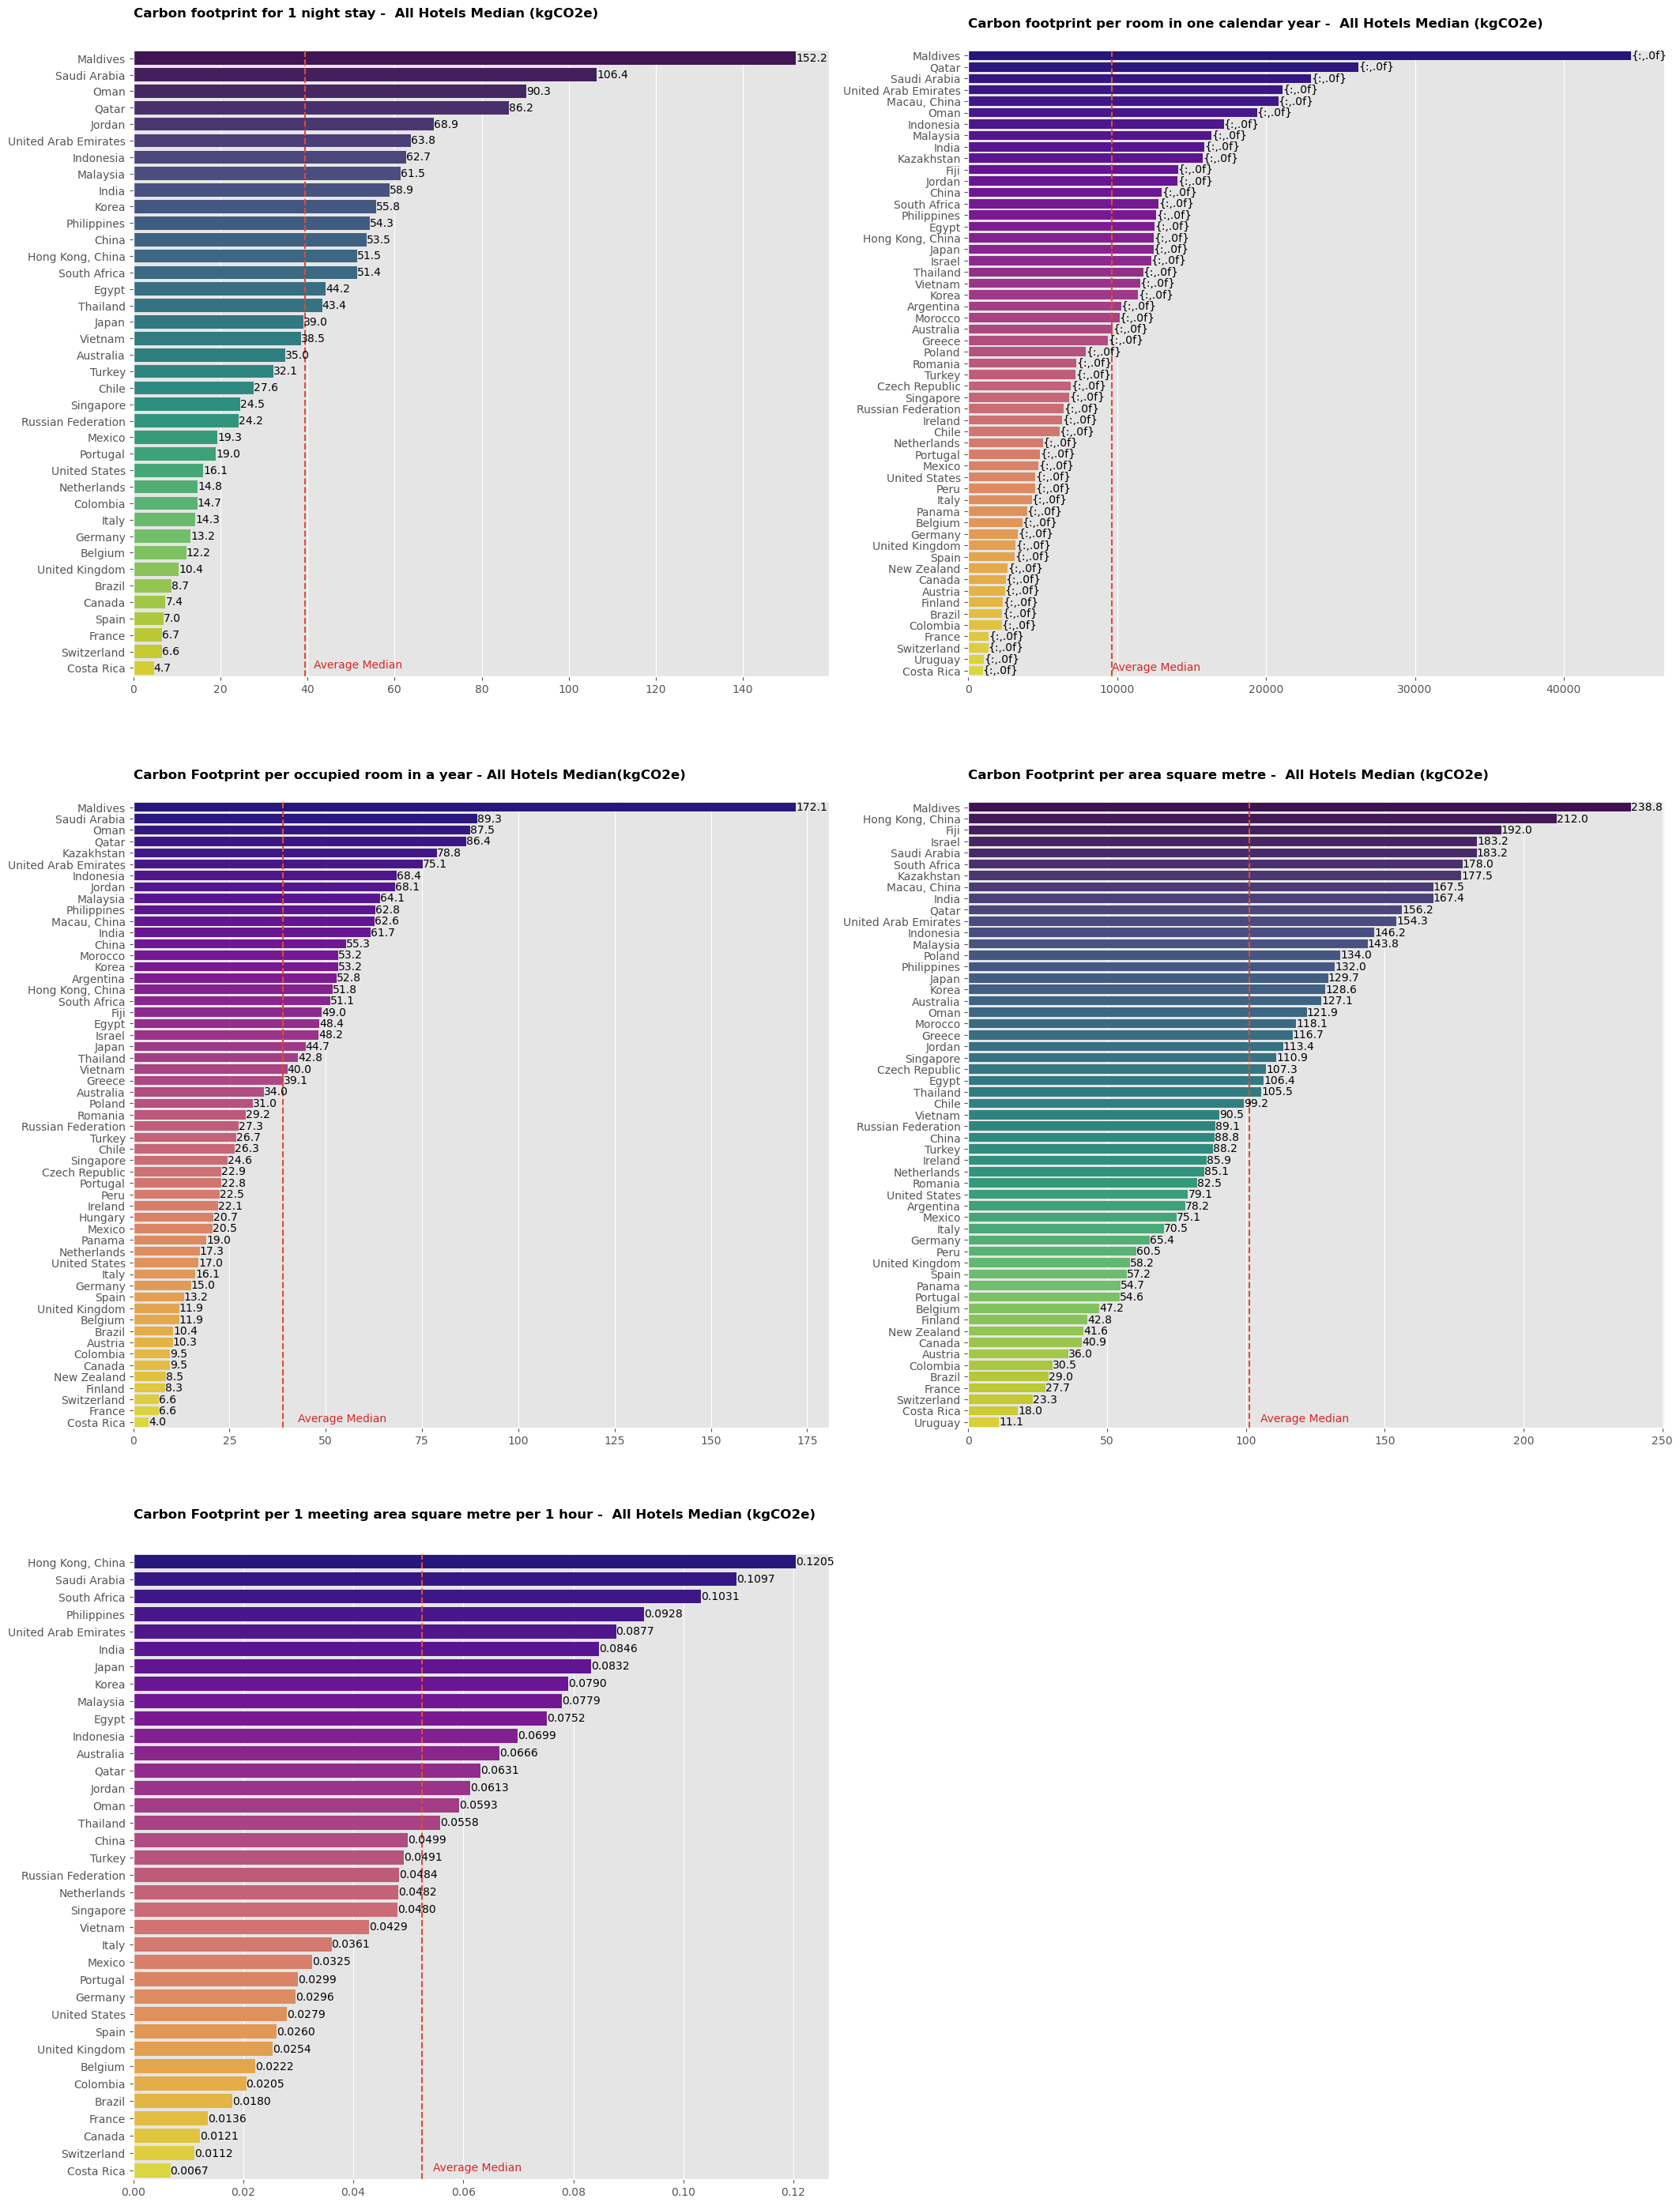

In [20]:
plt.figure(figsize=(25,35))

#plot 1
average_median_plot_1 = carbon_1_night_2021_clean['All HotelsMedian'].mean()

plt.subplot(3,2,1)
plot_1 = sns.barplot(data=carbon_1_night_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', label='All Hotels Median', palette='viridis')
plt.ylabel('')
plt.xlabel('')
plt.axvline(x=average_median_plot_1, ls='--')
plt.text(x=average_median_plot_1+2, y=37, s='Average Median', color='tab:red')

#title
plt.text(x=0, y=-2.5, s= 'Carbon footprint for 1 night stay -  All Hotels Median (kgCO2e)', size=12, weight='bold')

#bar labels
plt.bar_label(plot_1.containers[0], fmt='%.1f')



###
#plot 2
average_median_plot_2 = total_carbon_room_2021_clean['All HotelsMedian'].mean()

plt.subplot(3,2,2)
plot_2 = sns.barplot(data=total_carbon_room_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', label='All Hotels Median', palette='plasma')
plt.ylabel('')
plt.xlabel('')
plt.axvline(x=average_median_plot_2, ls='--')
plt.text(x=average_median_plot_2+4, y=54, s='Average Median', color='tab:red')

#title
plt.text(x=0, y=-2.5, s= 'Carbon footprint per room in one calendar year -  All Hotels Median (kgCO2e)', size=12, weight='bold')

#bar labels
plt.bar_label(plot_2.containers[0], fmt='{:,.0f}')



###
#plot 3
average_median_plot_3 = total_carbon_room_occupied_2021_clean['All HotelsMedian'].mean()

plt.subplot(3,2,3)
plot_3 = sns.barplot(data=total_carbon_room_occupied_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', label='All Hotels Median', palette='plasma')
plt.ylabel('')
plt.xlabel('')
plt.axvline(x=average_median_plot_3, ls='--')
plt.text(x=average_median_plot_3+4, y=54, s='Average Median', color='tab:red')

#title
plt.text(x=0, y=-2.5, s= 'Carbon Footprint per occupied room in a year - All Hotels Median(kgCO2e)', size=12, weight='bold')

#bar labels
plt.bar_label(plot_3.containers[0], fmt='%.1f')



###
#plot 4
average_median_plot_4 = total_carbon_area_2021_clean['All HotelsMedian'].mean()

plt.subplot(3,2,4)
plot_4 = sns.barplot(data=total_carbon_area_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', label='All Hotels Median', palette='viridis')
plt.ylabel('')
plt.xlabel('')
plt.axvline(x=average_median_plot_4, ls='--')
plt.text(x=average_median_plot_4+4, y=54, s='Average Median', color='tab:red')

#title
plt.text(x=0, y=-2.5, s= 'Carbon Footprint per area square metre -  All Hotels Median (kgCO2e)', size=12, weight='bold')

#bar labels
plt.bar_label(plot_4.containers[0], fmt='%.1f')


###
#plot 5
average_median_plot_5 = carbon_meeting_hour_2021_clean['All HotelsMedian'].mean()

plt.subplot(3,2,5)
plot_5 = sns.barplot(data=carbon_meeting_hour_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', label='All Hotels Median', palette='plasma')
plt.ylabel('')
plt.xlabel('')
plt.axvline(x=average_median_plot_5, ls='--')
plt.text(x=average_median_plot_5+0.002, y=35, s='Average Median', color='tab:red')

#title
plt.text(x=0, y=-2.5, s= 'Carbon Footprint per 1 meeting area square metre per 1 hour -  All Hotels Median (kgCO2e)', size=12, weight='bold')

#bar labels
plt.bar_label(plot_5.containers[0], fmt='%.4f')



## <font color='green'>Observations</font>

### <u>Highest Emitters</u>
* **Maldives** comes in as the top carbon emitter, reaching more than the second highest carbon emitter by 
    - 50% more kgCO2e for 1 night stay
    - 70% more kgCO2e for per room in 1 calendar year
    - 93% more kgCO2e for per OCCUPIED room in 1 calendar year
    - 12% more kgCO2e for per area square metre


* **Oman and Saudi Arabia** repeatedly showing up in top 3 carbon emitter for room based/ 1 night stay emissions
* Interestingly, **Fiji** is in the top 3 emitters for per area square meter given the island is assumed to be less developed. 
* Whereas it is easy to assume for **Hong Kong, China**, area per square emission are contributed by larger public areas, as demonstrated by its top emission of 0.12 kgCO2e per meeting area square metre per hour. 
* **Singapore and South Africa** has also come up in the top 3 emissions for per meeting area square metre per hour, about 40% more than the next highest emitter, suggesting more could be done to lower events emissions held at these 3 locations.

### <u>Lowest Emitters</u>

* **Costa Rica, Switzerland, France, Brazil and Canada** are the best performing lowest carbon emitters in this dataset.

## <font color='green'>Carbon emission - Highest and lowest emitters - By hotel segments 2019</font> 

We may be able to more significant pattern in hotel segments for the top countries (**Maldives, Oman, Saudi Arabia, Fiji, Hong Kong, China, Singapore, South Africa**) identified earlier. Given that places like **Fiji** is comparable to developed locations like **Hong Kong, China, and Saudi Arabia**, we may find the type of hotel operations matter more. As a reminder, we have kept the following 5 hotel segment columns:
* Economy and Midscale
* Upper Midscale
* Upscale
* Upper Upscale
* Luxury

In [21]:
def create_segment_df(df):
    #create new dataframe for country, segments and median with labels in order to group plot later
    top_carbon_emitters = df[df['Country'].isin(['Maldives', 'Oman', 'Saudi Arabia', 'Fiji', 'Hong Kong, China', 'Singapore', 'South Africa'])]
    median_em = top_carbon_emitters.loc[:,['Country', 'Economy and Midscale SegmentsMedian']]
    median_um = top_carbon_emitters.loc[:,['Country','Upper Midscale SegmentMedian']]
    median_us = top_carbon_emitters.loc[:,['Country','Upscale SegmentMedian']]
    median_uu = top_carbon_emitters.loc[:,['Country','Upper Upscale SegmentMedian']]
    median_lx = top_carbon_emitters.loc[:,['Country','Luxury SegmentMedian']]

    #add segment column with segment labels
    median_em['segment'] = 'Economy Midscale'
    median_um['segment'] = 'Upper Midscale'
    median_us['segment'] = 'Upscale'
    median_uu['segment'] = 'Upper Upscale'
    median_lx['segment'] = 'Luxury'

    #change median column name
    median_em.rename(columns = {'Economy and Midscale SegmentsMedian':'median'}, inplace = True)
    median_um.rename(columns = {'Upper Midscale SegmentMedian':'median'}, inplace = True)
    median_us.rename(columns = {'Upscale SegmentMedian':'median'}, inplace = True)
    median_uu.rename(columns = {'Upper Upscale SegmentMedian':'median'}, inplace = True)
    median_lx.rename(columns = {'Luxury SegmentMedian':'median'}, inplace = True)

    #concat all median df
    median_segment_df = pd.concat([median_em, median_um, median_us, median_uu, median_lx], axis=0, ignore_index=True)
    return median_segment_df


Text(0, -0.8, 'Carbon footprint per 1 meeting area square metre per 1 hour -  Segments Median (kgCO2e)')

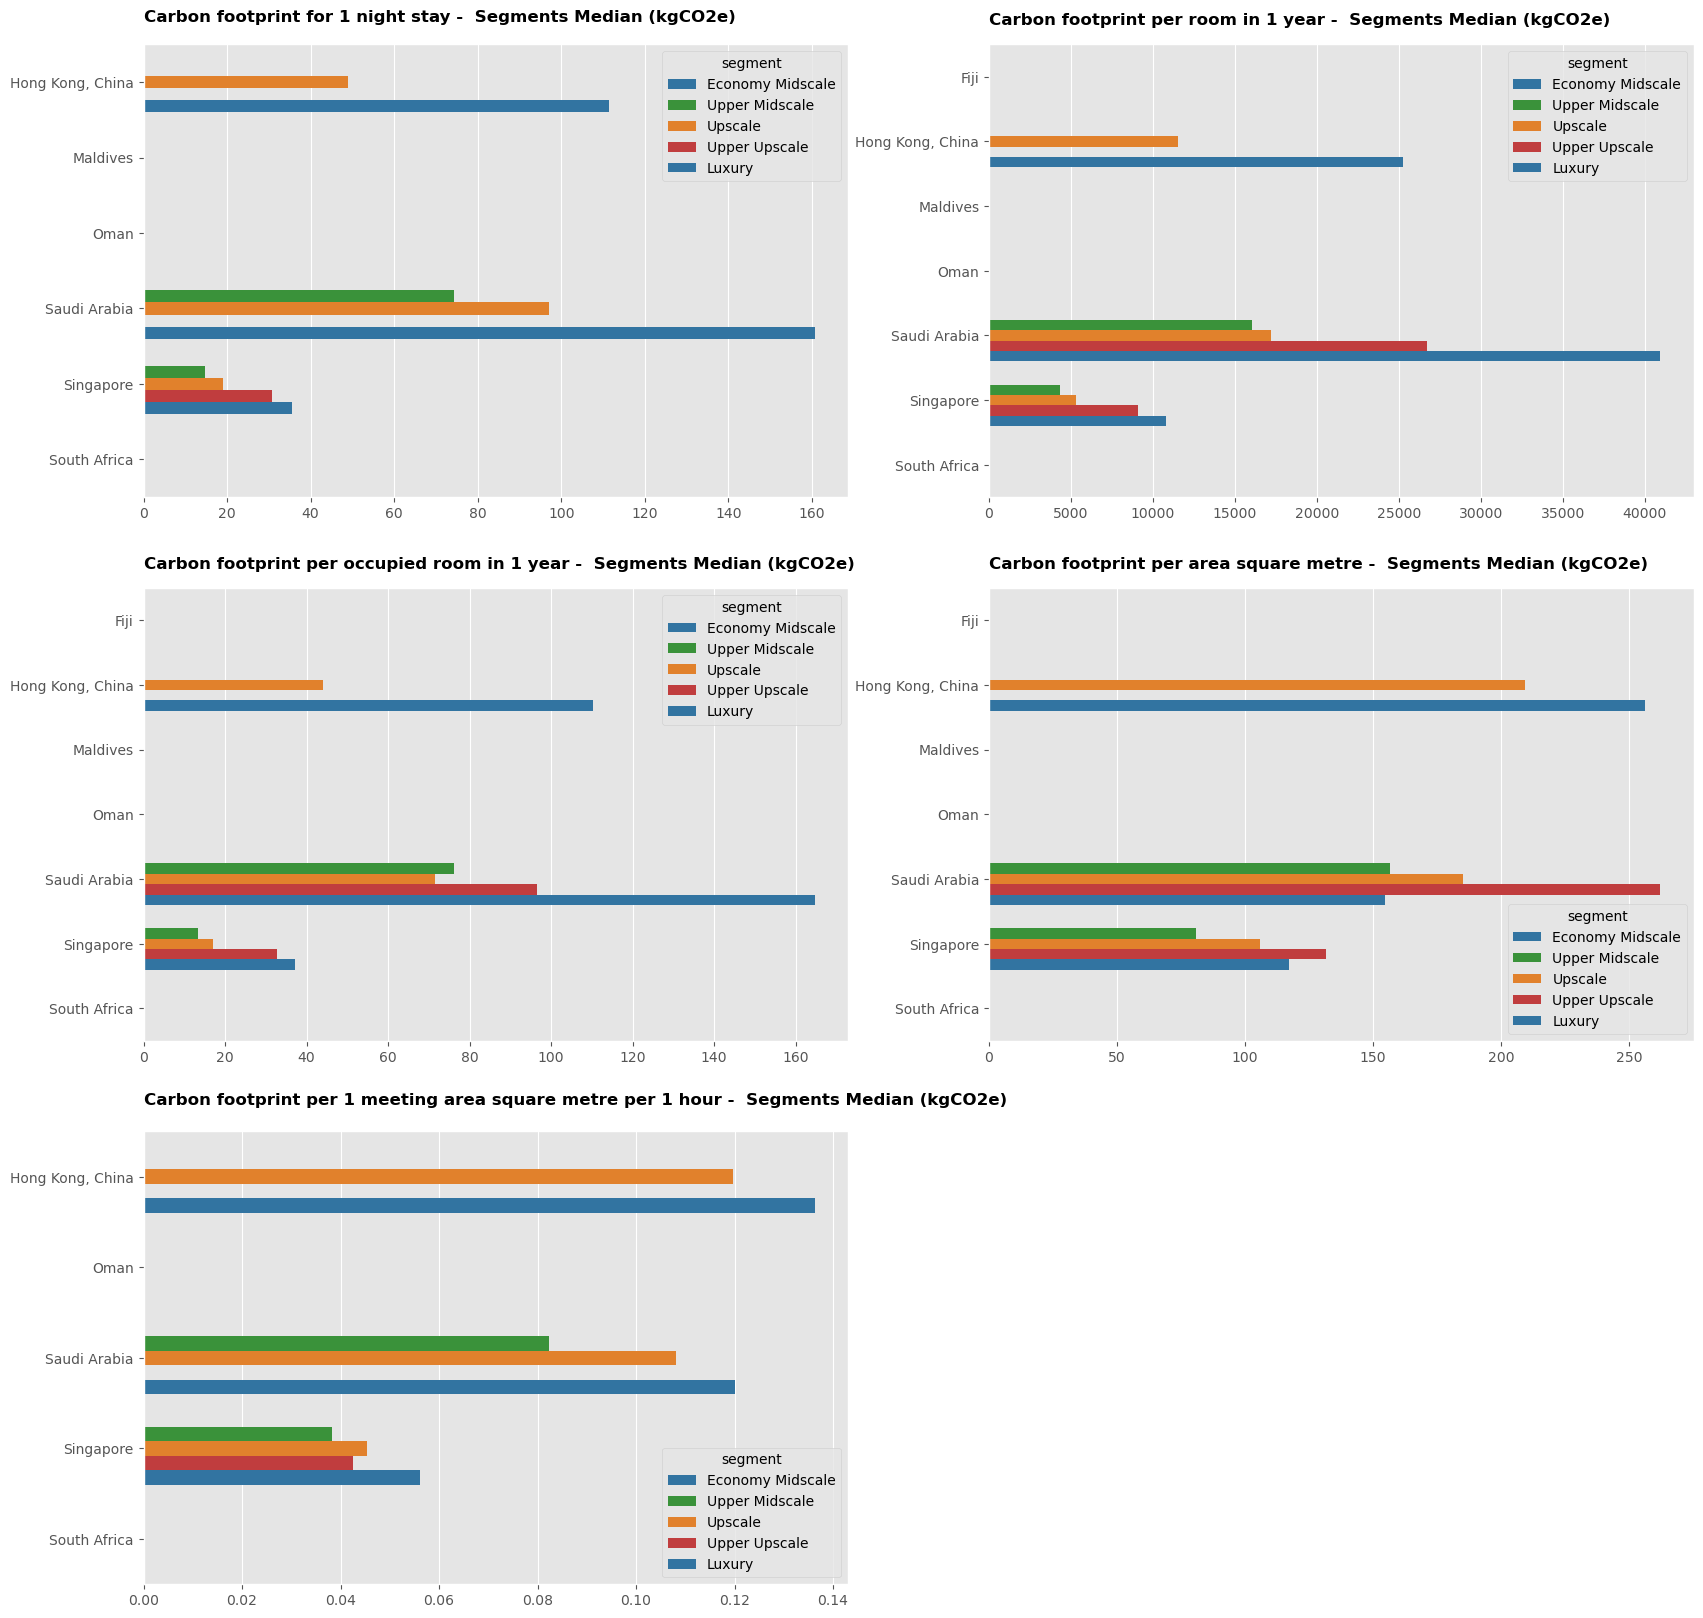

In [22]:
plt.figure(figsize=(20,20))

#plot 1
#create segment df
plot_1_segment = create_segment_df(carbon_1_night_2021_clean)

plt.subplot(3,2,1)
plot_1 = sns.barplot(data=plot_1_segment, y='Country', x='median', hue='segment', palette=['tab:blue', 'tab:green', 'tab:orange', 'tab:red'])
plt.ylabel('')
plt.xlabel('')

#title
plt.text(x=0, y=-0.8, s= 'Carbon footprint for 1 night stay -  Segments Median (kgCO2e)', size=12, weight='bold')

###
#plot 2
#create segment df
plot_2_segment = create_segment_df(total_carbon_room_2021_clean)

plt.subplot(3,2,2)
plot_2 = sns.barplot(data=plot_2_segment, y='Country', x='median', hue='segment', palette=['tab:blue', 'tab:green', 'tab:orange', 'tab:red'])
plt.ylabel('')
plt.xlabel('')

#title
plt.text(x=0, y=-0.8, s= 'Carbon footprint per room in 1 year -  Segments Median (kgCO2e)', size=12, weight='bold')


###
#plot 3
#create segment df
plot_3_segment = create_segment_df(total_carbon_room_occupied_2021_clean)

plt.subplot(3,2,3)
plot_3 = sns.barplot(data=plot_3_segment, y='Country', x='median', hue='segment', palette=['tab:blue', 'tab:green', 'tab:orange', 'tab:red'])
plt.ylabel('')
plt.xlabel('')

#title
plt.text(x=0, y=-0.8, s= 'Carbon footprint per occupied room in 1 year -  Segments Median (kgCO2e)', size=12, weight='bold')


###
#plot 4
#create segment df
plot_4_segment = create_segment_df(total_carbon_area_2021_clean)

plt.subplot(3,2,4)
plot_4 = sns.barplot(data=plot_4_segment, y='Country', x='median', hue='segment', palette=['tab:blue', 'tab:green', 'tab:orange', 'tab:red'])
plt.ylabel('')
plt.xlabel('')

#title
plt.text(x=0, y=-0.8, s= 'Carbon footprint per area square metre -  Segments Median (kgCO2e)', size=12, weight='bold')



###
#plot 5
#create segment df
plot_5_segment = create_segment_df(carbon_meeting_hour_2021_clean)

plt.subplot(3,2,5)
plot_5 = sns.barplot(data=plot_5_segment, y='Country', x='median', hue='segment', palette=['tab:blue', 'tab:green', 'tab:orange', 'tab:red'])
plt.ylabel('')
plt.xlabel('')

#title
plt.text(x=0, y=-0.8, s= 'Carbon footprint per 1 meeting area square metre per 1 hour -  Segments Median (kgCO2e)', size=12, weight='bold')

## <font color='green'>Observations</font>

### <u>Highest Emitting Segment - Luxury</u>

* Unfortunately Maldives, Oman, Fiji and South Africa are all missing granular information on its segment division.

* **Saudi Arabia** is showing a good amount of emissions in the `Luxury` segment with about **50% - 60% more than other segments in *room based/1 night stay* measures**. Only surpassed by `Upper Upscale` segment under the area per square metre measure.

* **Hong Kong, China**, albeit only have 2 segment data,  also shows similar results, **where `Luxury` segment far exceeds `Upscale` segment** in carbon emissions in all 5 carbon emissions measures.

* While **Singapore** has about half of emissions in *meeting area per hour* as compared to Saudi Arabia, it shares similar pattern as Hong Kong, China where **`Luxury` segment has the most emissions, while in *area per square metre* measure, `Upper Upscale` slightly exceeds `Luxury`.**

* [Upper Upscale hotels](https://loyaltytraveler.boardingarea.com/2012/01/15/hilton-marriott-and-ihg-hotel-brand-market-segments/) appears to have more  [MICE](https://www.cvent.com/uk/blog/hospitality/what-is-mice) function rooms focussed hotels, perhaps driving up carbon emissions to surpass `Luxury` hotels when fully booked.

### <u>Lowest Emitting Segment - Upper Midscale</u>
_______

## <font color='green'>Energy Usage - Highest and lowest countries - All Hotels 2019</font>

There are 3 energy measures in this dataset:
* total energy usage per occupied room in a calendar year
* total energy usage per area square metre in a calendar year
* Percentage of energy usage within a calendar year that was generated *onsite* from renewable sources. 

**Note** *that we will be using mean for percentage of renewable energy as there are no median data.*

[Text(0, 0, '0.068%'),
 Text(0, 0, '0.054%'),
 Text(0, 0, '0.031%'),
 Text(0, 0, '0.026%'),
 Text(0, 0, '0.019%'),
 Text(0, 0, '0.018%'),
 Text(0, 0, '0.017%'),
 Text(0, 0, '0.015%'),
 Text(0, 0, '0.015%'),
 Text(0, 0, '0.012%'),
 Text(0, 0, '0.010%'),
 Text(0, 0, '0.008%'),
 Text(0, 0, '0.008%'),
 Text(0, 0, '0.005%'),
 Text(0, 0, '0.002%'),
 Text(0, 0, '0.001%'),
 Text(0, 0, '0.001%'),
 Text(0, 0, '0.001%'),
 Text(0, 0, '0.001%'),
 Text(0, 0, '0.001%'),
 Text(0, 0, '0.001%'),
 Text(0, 0, '0.001%'),
 Text(0, 0, '0.001%'),
 Text(0, 0, '0.001%'),
 Text(0, 0, '0.001%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0, '0.000%'),
 Text(0, 0,

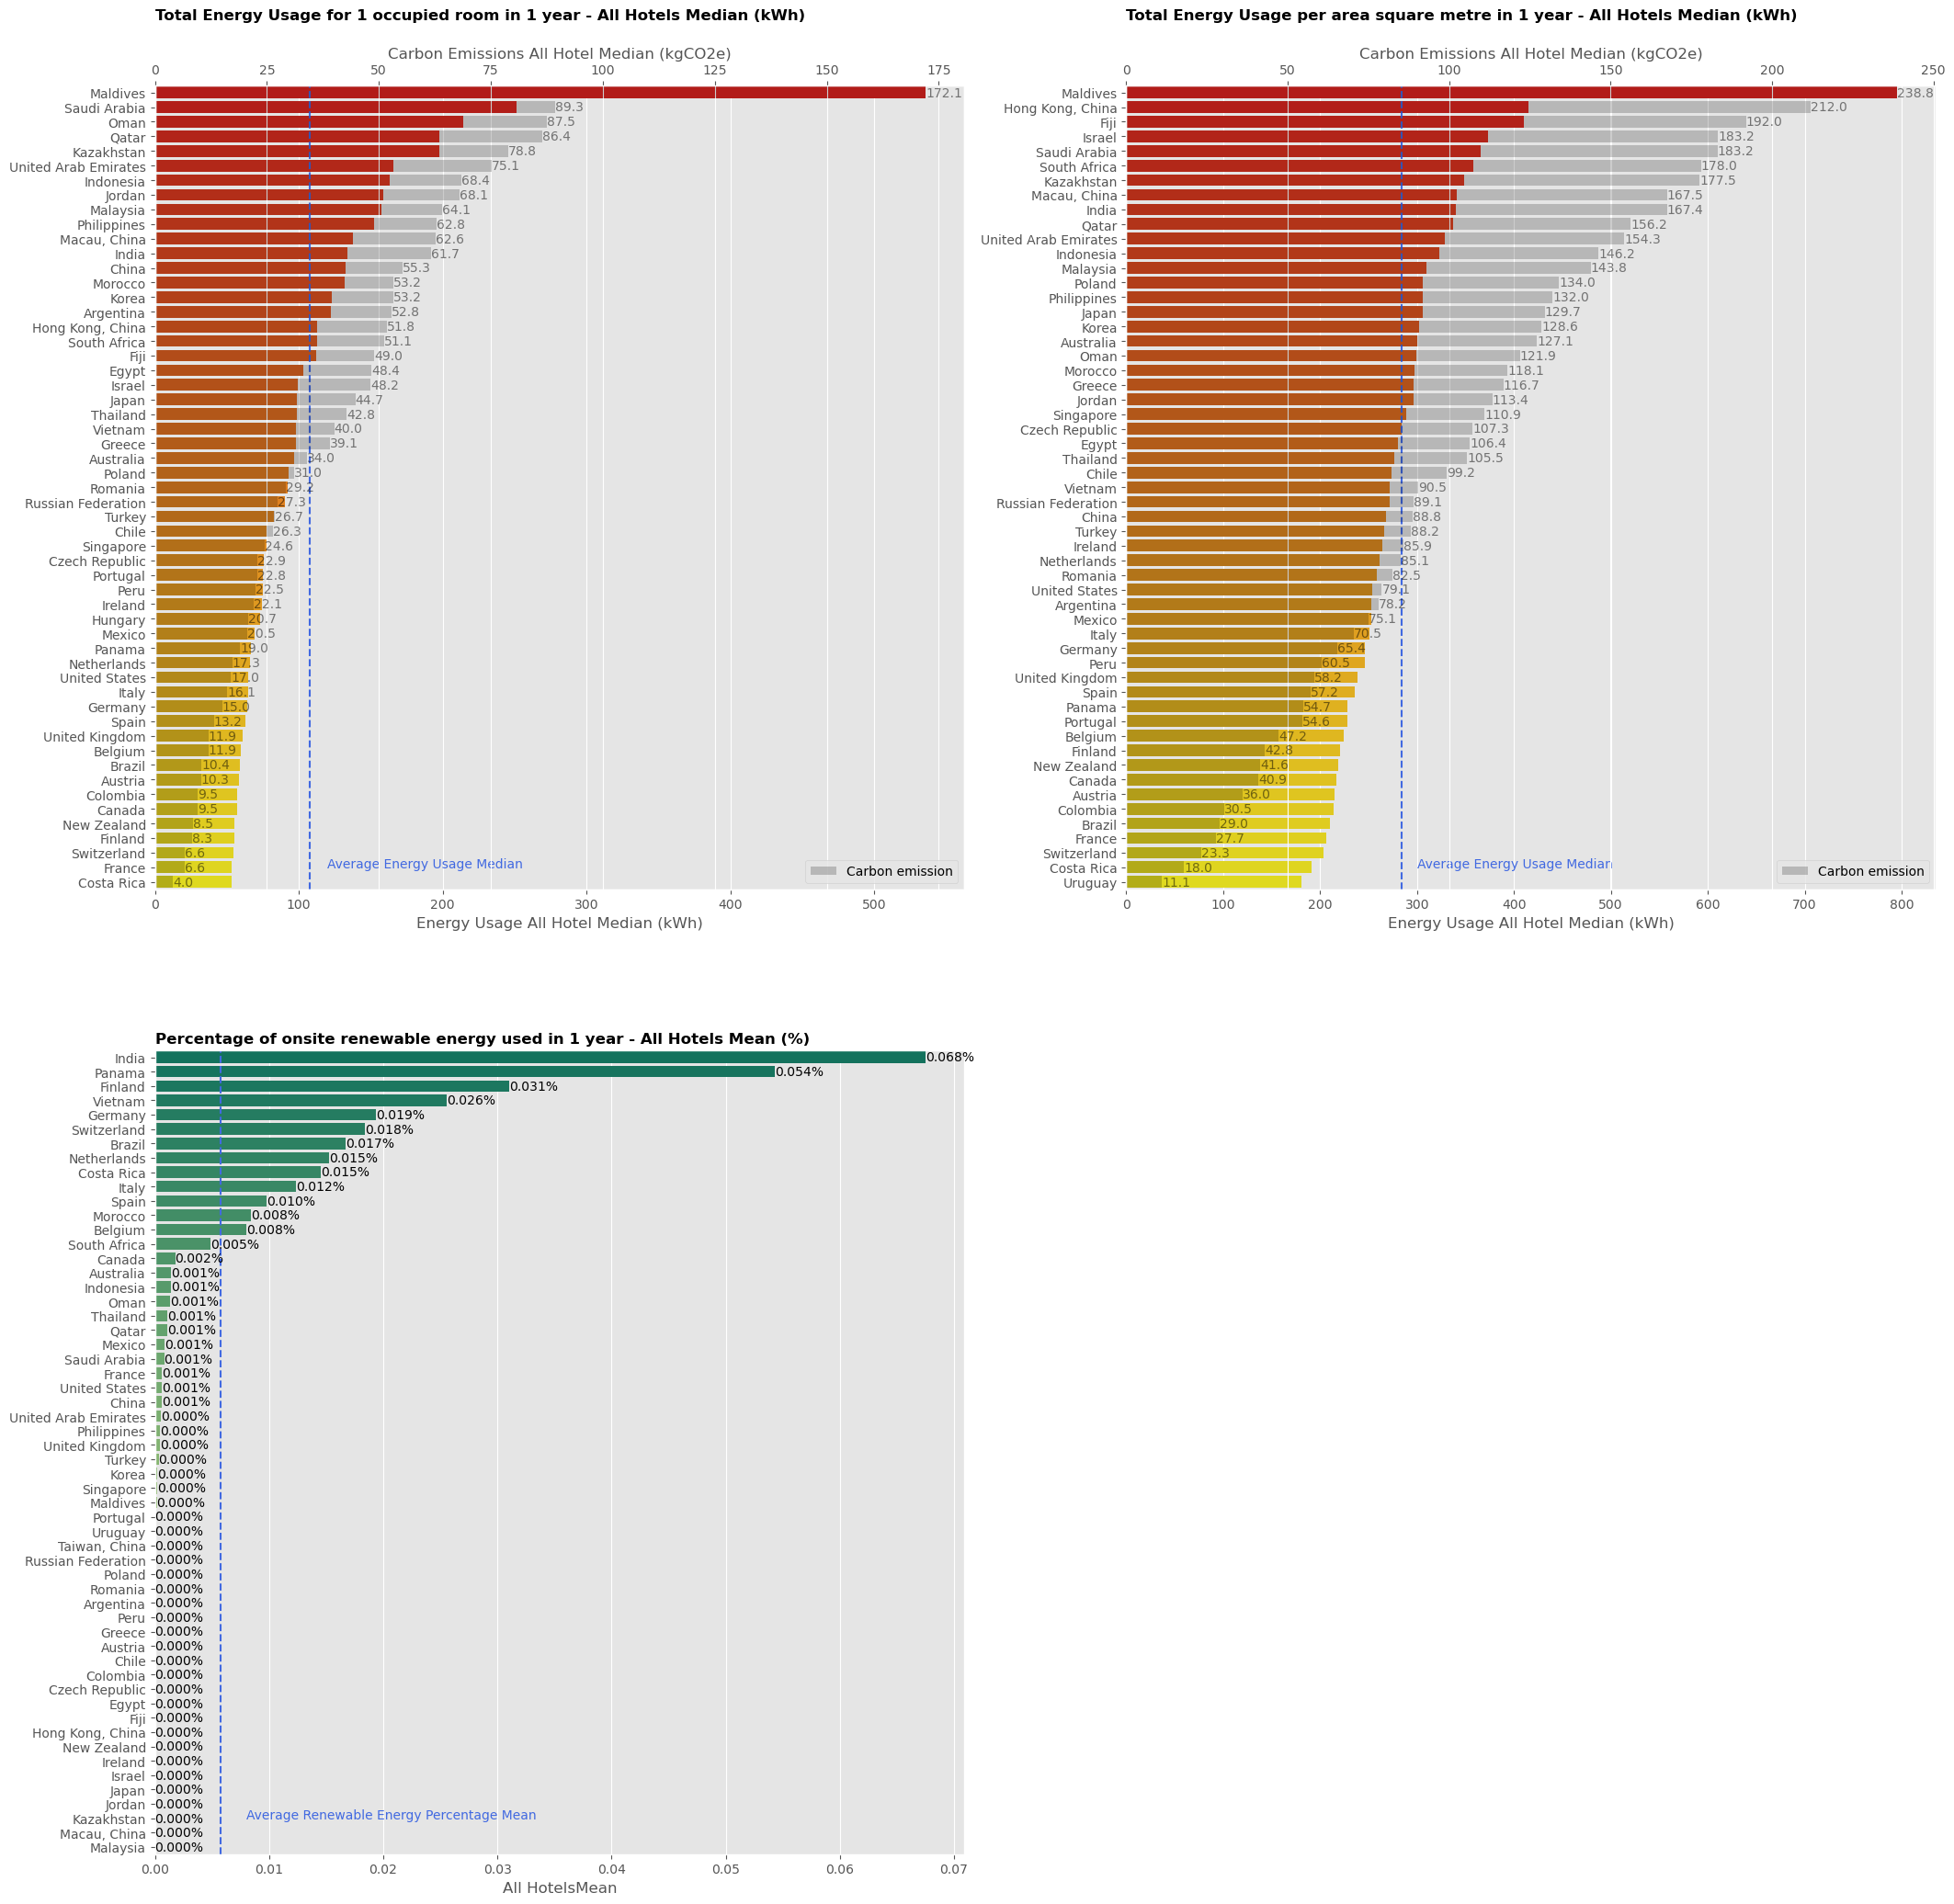

In [23]:
plt.figure(figsize=(25,25))

##plot 1
ax1 = plt.subplot(2,2,1)
average_median_1 = total_energy_occupied_room_2021_clean['All HotelsMedian'].mean()

ax1 = sns.barplot(data=total_energy_occupied_room_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', 
                  palette='autumn')
plt.text(0, -5, 'Total Energy Usage for 1 occupied room in 1 year - All Hotels Median (kWh)', size=12, weight='bold')
plt.ylabel('')
plt.axvline(average_median_1, ls='--', color='royalblue')
plt.text(120, 53, 'Average Energy Usage Median', color='royalblue')
plt.xlabel('Energy Usage All Hotel Median (kWh)')

#overlap carbon emissions for occupied room
ax2 = ax1.twiny() # instantiate a second axes that shares the same x-axis
ax2 = sns.barplot(data=total_carbon_room_occupied_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', 
                  label='Carbon emission', color='k', alpha=0.2)
plt.xlabel('Carbon Emissions All Hotel Median (kgCO2e)')
plt.legend()
plt.bar_label(ax2.containers[0], fmt='%.1f', alpha=0.5)

##plot 2
ax3 = plt.subplot(2,2,2)
average_median_2 = total_energy_area_2021_clean['All HotelsMedian'].mean()

ax3 = sns.barplot(data=total_energy_area_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', palette='autumn')
plt.text(0, -5, 'Total Energy Usage per area square metre in 1 year - All Hotels Median (kWh)', size=12, weight='bold')
plt.ylabel('')
plt.axvline(average_median_2, ls='--', color='royalblue')
plt.text(300, 53, 'Average Energy Usage Median', color='royalblue')
plt.xlabel('Energy Usage All Hotel Median (kWh)')


#overlap carbon emissions for area square metre
ax4 = ax3.twiny() # instantiate a second axes that shares the same x-axis
ax4 = sns.barplot(data=total_carbon_area_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', 
                  label='Carbon emission', color='k', alpha=0.2)
plt.xlabel('Carbon Emissions All Hotel Median (kgCO2e)')
plt.legend()
plt.bar_label(ax4.containers[0],fmt='%.1f', alpha=0.5)

##plot 3
average_median_3 = renewable_energy_percentage_2021_clean['All HotelsMean'].mean()
ax5 = plt.subplot(2,2,3)
ax5 = sns.barplot(data=renewable_energy_percentage_2021_clean.sort_values(by='All HotelsMean', ascending=False), y='Country', x='All HotelsMean', palette='summer')
plt.text(0, -1, 'Percentage of onsite renewable energy used in 1 year - All Hotels Mean (%)', size=12, weight='bold')
plt.axvline(average_median_3, ls='--', color='royalblue')
plt.text(0.008, 53, 'Average Renewable Energy Percentage Mean', color='royalblue')
plt.ylabel('')
plt.bar_label(ax5.containers[0], fmt='%.3f%%')

## <font color='green'>Observations</font>

### <u>Highest Energy Usage</u>
* **Maldives** remain in the top spot for highest energy usage, with at least *50% more energy* used than the next highest country for both per occupied room and area square metre in 1 calendar year.

When we overlapped the carbon emissions over the energy usage, we **found that several countries with comparable energy usage have starkly different carbon emissions**, suggesting one country may have a better carbon neutral approach than the other. This is of interest to see if there are any pointers for exchange.

* For *Total Energy Usage for 1 occupied room in 1 calendar year*, 
    
    - **Qatar** and **Kazakhstan** has almost equivalent energy usage ,but Kazakhstan is able to clock in 10% less carbon emissions
    - **United Arab Emirates** and **Indonesia**, similarly with almost equivalent energy usage, Indonesia has 10% less carbon emissions
    - **China** and **India**, similarly with almost equivalent energy usage, China has 10% less carbon emissions
    - **Israel** and **Australia**, with almost equivalent energy usage, Australia is able to clock in 40% less carbon emissions

    
* For *Total Energy Usage per area square metre in a calendar year*, 
    
    - **Hong Kong** and **Fiji**(lower emissions) has a 10% difference in carbon emissions whilst having similar energy usage
    - **Poland** and **Jordan**(lower emissions) also has about 18% difference in carbon emissions whilst having similar energy usage
    - **Singapore** and **Vietnam**(lower emissions) has 22% difference in carbon emissions with almost similar energy usage.


* For *Renewable Energy Percentage*
    - only 13 out of 55 countries **(23%) have above average percentage of onsite renewable energy**
    - 27 out of 55 countries **(50%) have no onsite renewable energy provision** at all
    - the top 3 countries with highest renewable energy provisions are **India, Panama and Finland**
    - We see that Panama and Finland has rather low carbon emissions which is evident of its high renewable energy provisions
    - Interestingly, **India** despite having the **highest renewable energy provisions** of 0.0068%, **25% more than next highest Panama**, India carbon emissions remain **above average for both occupied room and area square metre measures.** 

### <u>Lowest Energy Usage</u>
* **Costa Rica, France, Switzerland, Brazil** are again in the best performing list for least energy usage.
_____

## <font color='green'>Water Usage - Highest and lowest countries - All Hotels 2019</font>

There are 4 water usage measures in this dataset:

* water usage per 1 night stay
* total water usage per occupied room in 1 calendar year
* total water usage per area square metre in 1 calendar year
* water usage per meeting area square area per hour

Let's inspect the data and check for countries with highest and lowest median water usage in each of the measures under all hotels.

[Text(0, 0, '1.25'),
 Text(0, 0, '1.22'),
 Text(0, 0, '1.20'),
 Text(0, 0, '1.10'),
 Text(0, 0, '1.09'),
 Text(0, 0, '1.07'),
 Text(0, 0, '1.04'),
 Text(0, 0, '1.01'),
 Text(0, 0, '0.86'),
 Text(0, 0, '0.84'),
 Text(0, 0, '0.78'),
 Text(0, 0, '0.78'),
 Text(0, 0, '0.72'),
 Text(0, 0, '0.64'),
 Text(0, 0, '0.54'),
 Text(0, 0, '0.53'),
 Text(0, 0, '0.52'),
 Text(0, 0, '0.52'),
 Text(0, 0, '0.47'),
 Text(0, 0, '0.44'),
 Text(0, 0, '0.40'),
 Text(0, 0, '0.35')]

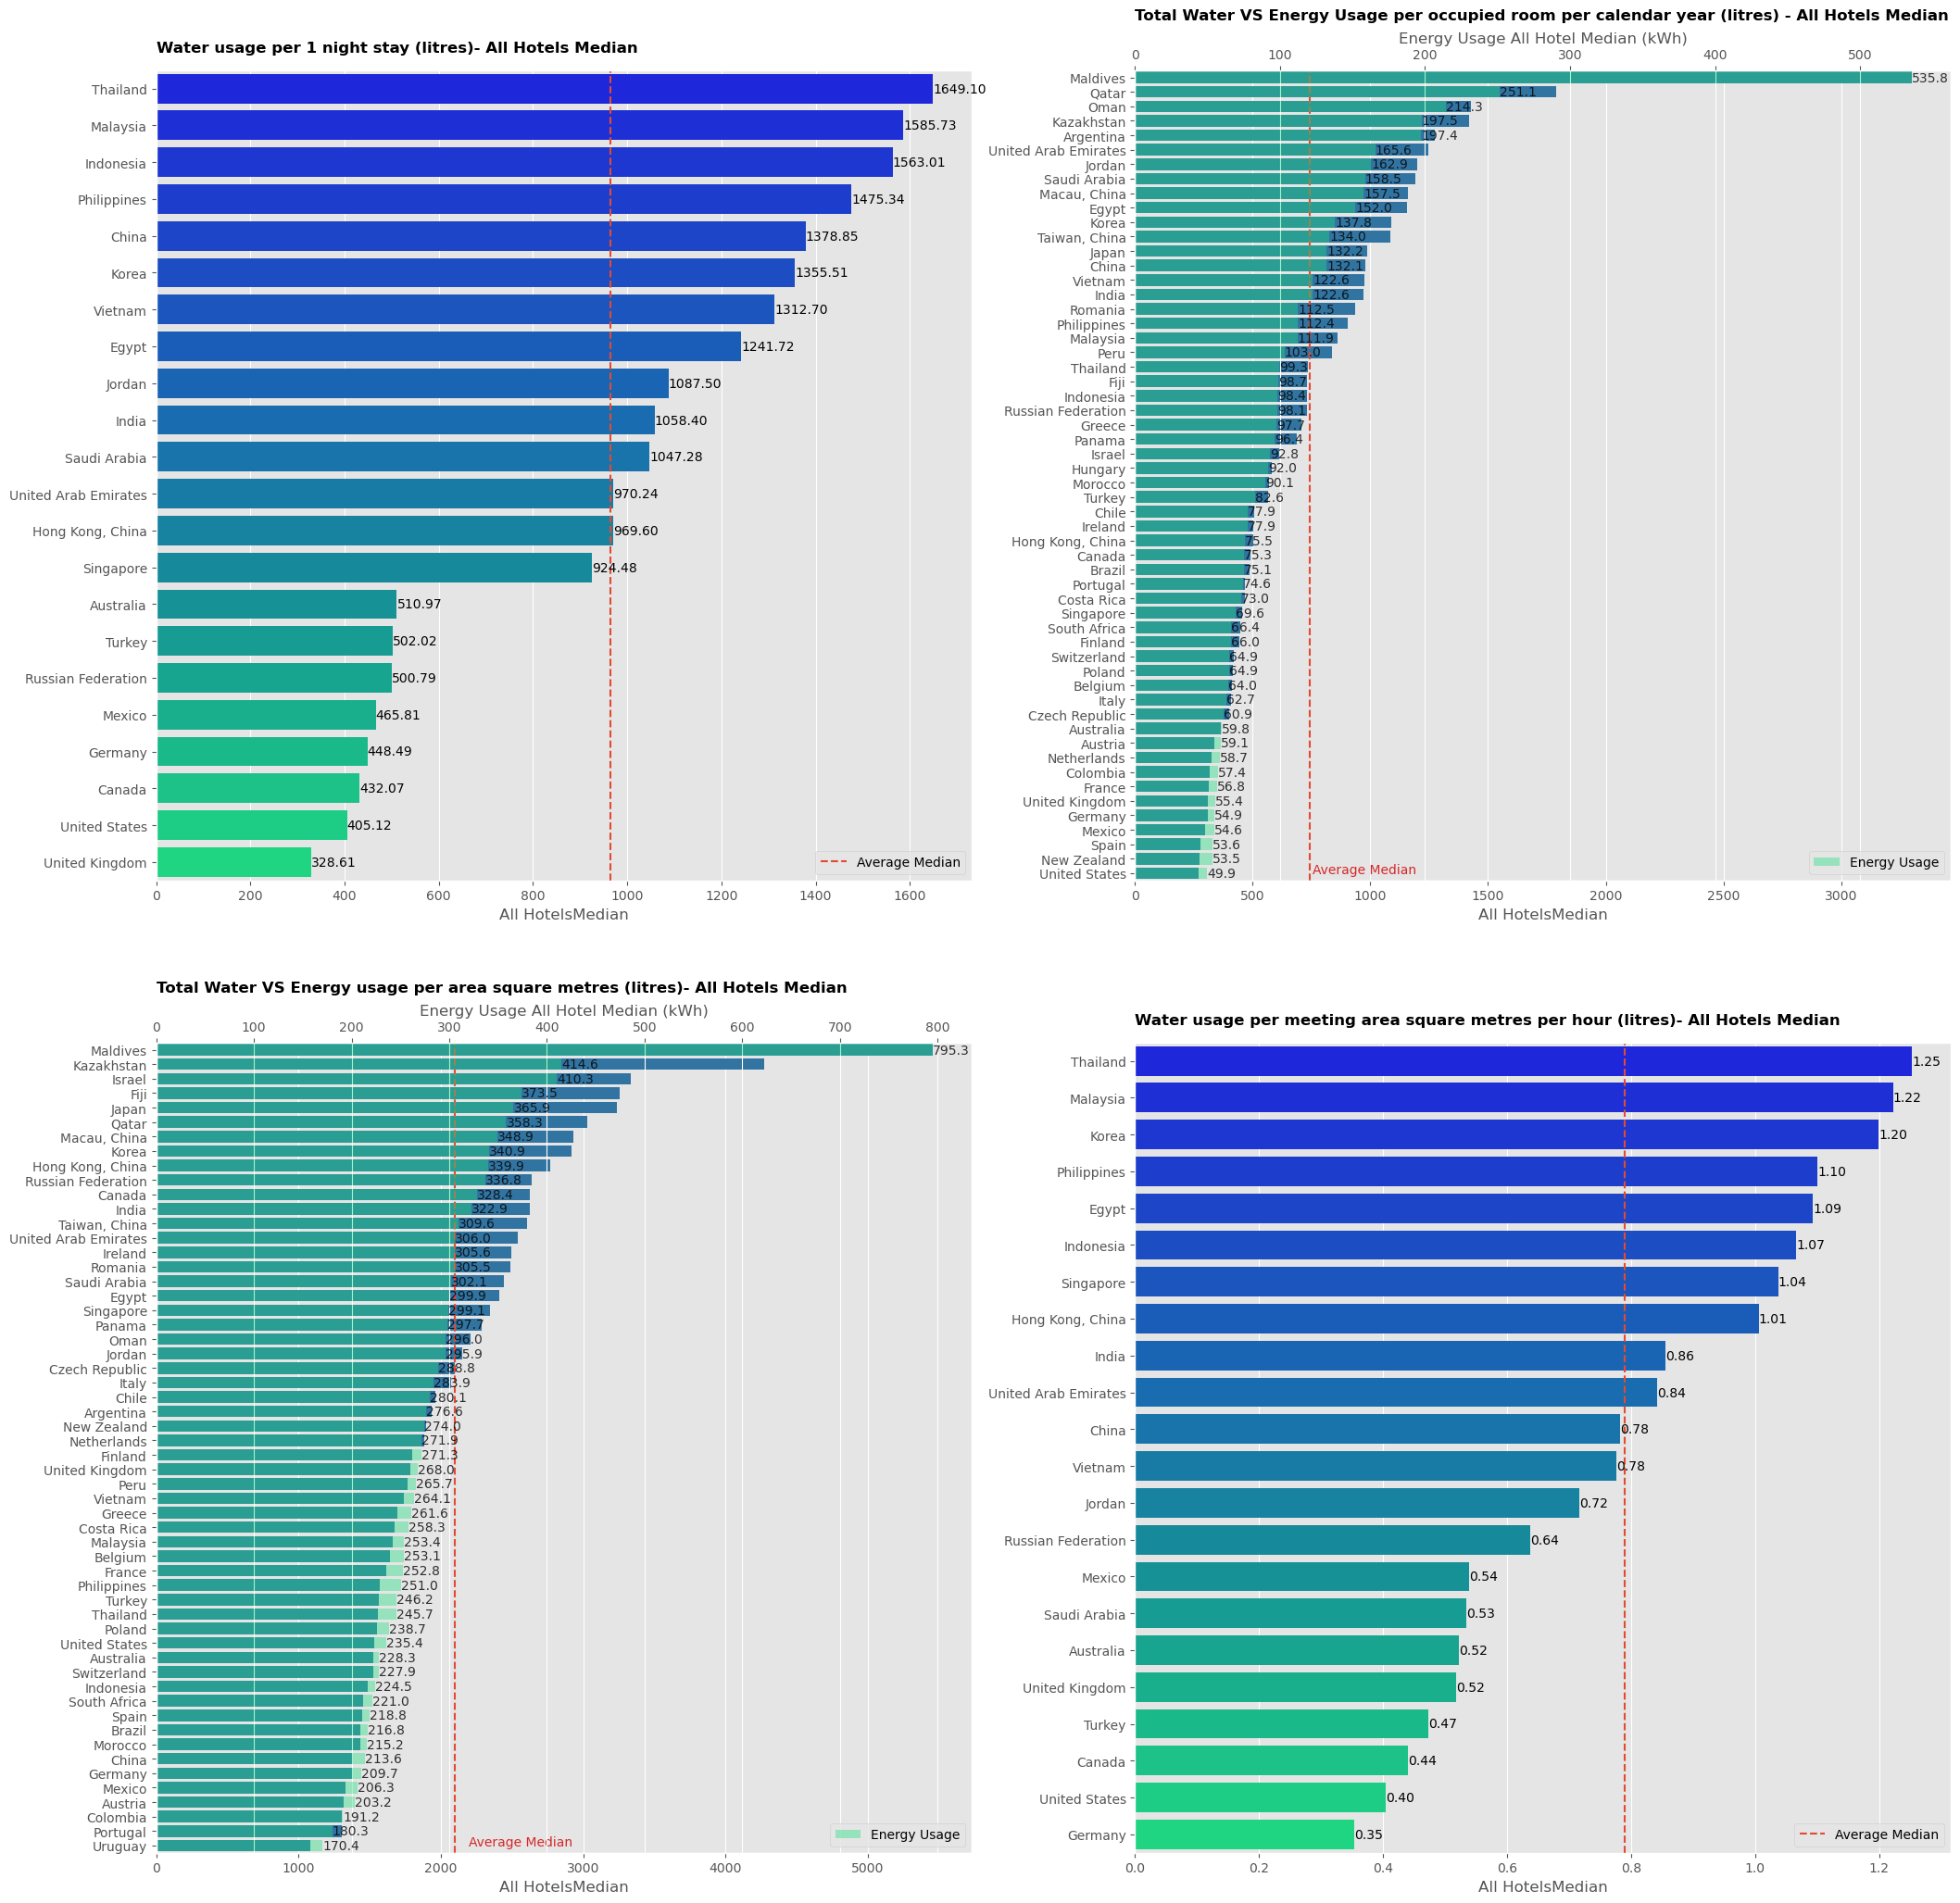

In [24]:
plt.figure(figsize=(25,25))

#water plot 1
plt.subplot(2,2,1)

water_plot1 = sns.barplot(data=water_1_night_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', palette='winter')
plt.text(x=0, y=-1, s='Water usage per 1 night stay (litres)- All Hotels Median', size=12, weight='bold')
plt.ylabel('')

avg_median_water1 = water_1_night_2021_clean['All HotelsMedian'].mean()
plt.axvline(avg_median_water1, ls='--', label='Average Median')
plt.legend()

plt.bar_label(water_plot1.containers[0], fmt='%.2f')


#water plot 2 & 3
plt.subplot(2,2,2)

water_plot2 = sns.barplot(data=total_water_occupied_rooms_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', color='tab:blue')
plt.text(x=0, y=-4, s='Total Water VS Energy Usage per occupied room per calendar year (litres) - All Hotels Median', size=12, weight='bold')
plt.ylabel('')

avg_median_water2 = total_water_occupied_rooms_2021_clean['All HotelsMedian'].mean()
plt.axvline(avg_median_water2, ls='--')
plt.text(x=avg_median_water2+10, y=55, s='Average Median', color='tab:red')

#overlap energy usage for occupied room
water_plot3 = water_plot2.twiny() # instantiate a second axes that shares the same x-axis
water_plot3 = sns.barplot(data=total_energy_occupied_room_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', 
                  label='Energy Usage', color='springgreen', alpha=0.4)
plt.xlabel('Energy Usage All Hotel Median (kWh)')
plt.legend()
plt.bar_label(water_plot3.containers[0], fmt='%.1f', alpha=0.8)



#water plot 4 & 5
plt.subplot(2,2,3)

water_plot4 = sns.barplot(data=total_water_area_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', color='tab:blue')
plt.text(x=0, y=-4, s='Total Water VS Energy usage per area square metres (litres)- All Hotels Median', size=12, weight='bold')
plt.ylabel('')

avg_median_water4 = total_water_area_2021_clean['All HotelsMedian'].mean()
plt.axvline(avg_median_water4, ls='--')
plt.text(x=avg_median_water4+100, y=55, s='Average Median', color='tab:red')


#overlap energy usage for area
water_plot5 = water_plot4.twiny() # instantiate a second axes that shares the same x-axis
water_plot5 = sns.barplot(data=total_energy_area_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', 
                  label='Energy Usage', color='springgreen', alpha=0.4)
plt.xlabel('Energy Usage All Hotel Median (kWh)')
plt.legend()
plt.bar_label(water_plot5.containers[0], fmt='%.1f', alpha=0.8)



#water plot 6
plt.subplot(2,2,4)

water_plot6 = sns.barplot(data=water_meeting_hour_2021_clean.sort_values(by='All HotelsMedian', ascending=False), y='Country', x='All HotelsMedian', palette='winter')
plt.text(x=0, y=-1, s='Water usage per meeting area square metres per hour (litres)- All Hotels Median', size=12, weight='bold')
plt.ylabel('')

avg_median_water6 = water_meeting_hour_2021_clean['All HotelsMedian'].mean()
plt.axvline(avg_median_water6, ls='--', label='Average Median')
plt.legend()

plt.bar_label(water_plot6.containers[0], fmt='%.2f')

## <font color='green'>Observations</font>

### <u>Highest Water Usage</u>
* According to [this article](https://www.brightest.io/calculate-carbon-footprint-water-emissions), water supply and treatment for drinking or heating for  hot showers make up a large percentage of energy usage, hence creating substantial carbon emissions. 

* For water usage it appears that **Thailand, Indonesia, Malaysia, Philippines, Korea, Egypt** have join the ranks of the other top energy usage countries, coming up at top 10 in each of the measures.

* For *Total Water Usage per occupied room in a calendar year* 

    * Countries with usage above average appear to have consistent proportion of energy usage except for **Korea, Taiwan, Romania and Philippines** that has far **more water usage in proportion to energy usage**


* For *Total Water Usage per area square metres* 

    * **Kazakhstan, Fiji, Japan, Macau, Korea and Taiwan** stand out having far **more water usage in proportion to energy usage**


It may be reasonable to deduce that **Thailand, Indonesia, Philippines, Malaysia, Taiwan and Egypt have poorer water sanitation system** that may require more energy for purification. It is hard to imagine **[Japan](https://www.macrotrends.net/countries/JPN/japan/clean-water-access-statistics) and [Korea](https://www.macrotrends.net/countries/KOR/south-korea/clean-water-access-statistics)** with abundance of clean water having the same issue. Perhaps this has to do with **heating during colder seasons**, it is worth checking how different are other seasonal countries solving this problem.

### <u>Lowest Water Usage</u>
* **United States, Germany, Canada, Mexico, United Kingdom** dominates the bottom least water usage, despite the need for heating water during colder seasons.
_________

## <font color='green'>Comparing Carbon Emission Trends for year 2016, 2017, 2018, 2019, 2021<font/>

We have looked at the patterns of carbon emissions, energy usage and water usage only for year 2019, it would be interesting to compare the carbon emissions trend over the 5-year datasets we have. Let's import the 2018, 2019, 2020, 2023 datasets, and focus on specifically  on carbon emission and renewable energy sheets.


In [25]:
def data_import(filepath, year):
    file = pd.ExcelFile(filepath)
    #assigning df names to each tab
    globals()[f"carbon_1_night_{year}"] = pd.read_excel(file, sheet_name='M1', header=None)
    globals()[f"total_carbon_room_occupied_{year}"] = pd.read_excel(file, sheet_name='M3', header=None)
    globals()[f"total_carbon_area_{year}"] = pd.read_excel(file, sheet_name='M4', header=None)
    globals()[f"carbon_meeting_hour_{year}"] = pd.read_excel(file, sheet_name='M7', header=None)
    globals()[f"renewable_energy_percentage_{year}"] = pd.read_excel(xls, sheet_name='M12', header=None)

data_import('Hotel Sustainability Benchmarking Index 2018.xlsx', 2018)
data_import('Hotel Sustainability Benchmarking Index 2019.xlsx', 2019)
data_import('Hotel Sustainability Benchmarking Index 2020.xlsx', 2020)
data_import('Hotel Sustainability Benchmarking Index 2023.xlsx', 2023)

#check data has been loaded
carbon_1_night_2018.head()

0           1    \
0  MEASURE 1: HCMI Rooms Footprint Per Occupied R...         NaN   
1                                           LOCATION         NaN   
2                                                NaN         NaN   
3                                          Geography        Type   
4                                           Aberdeen  Metro Area   

              2                3              4                         5    \
0             NaN              NaN            NaN                       NaN   
1             NaN       All Hotels            NaN                       NaN   
2             NaN  All HotelsCount  All HotelsLow  All HotelsLower Quartile   
3         Country            Count            Low            Lower Quartile   
4  United Kingdom              NaN            NaN                       NaN   

              6                 7                         8               9    \
0             NaN               NaN                       NaN             NaN   
1             NaN               NaN                       NaN             NaN   
2  All HotelsMean  All HotelsMedian  All HotelsUpper Quartile  All HotelsHigh   
3            Mean            Median            Upper Quartile            High   
4             NaN               NaN                       NaN             NaN   

   ...          169        170           171         172  \
0  ...          NaN        NaN           NaN         NaN   
1  ...          NaN        NaN       5 Stars         NaN   
2  ...  4 StarsHigh  4 StarsSD  5 StarsCount  5 StarsLow   
3  ...         High         SD         Count         Low   
4  ...          NaN        NaN           NaN         NaN   

                     173          174            175                    176  \
0                    NaN          NaN            NaN                    NaN   
1                    NaN          NaN            NaN                    NaN   
2  5 StarsLower Quartile  5 StarsMean  5 StarsMedian  5 StarsUpper Quartile   
3         Lower Quartile         Mean         Median         Upper Quartile   
4                    NaN          NaN            NaN                    NaN   

           177        178  
0          NaN        NaN  
1          NaN        NaN  
2  5 StarsHigh  5 StarsSD  
3         High         SD  
4          NaN        NaN  

[5 rows x 179 columns]

In [26]:
def data_manipulate(year):
    all_df = [globals()[f"carbon_1_night_{year}"], globals()[f"total_carbon_room_occupied_{year}"],
              globals()[f"total_carbon_area_{year}"], globals()[f"carbon_meeting_hour_{year}"], globals()[f"renewable_energy_percentage_{year}"]]
    
    for df in all_df:
        #rename row 2 column 1,2 into Type, Country
        df.iloc[2,1] = 'Type'
        df.iloc[2,2] = 'Country'
        #select row 2 to be the column names
        df.columns = df.iloc[2]
        #drop first 4 rows of header and NaN values
        df.drop([0,1,2,3], axis='index', inplace=True)

    #keep only count and mean since we don't have distribution of other statistics and full hotel columns
    columns_keep = ['Type', 'Country', 'All HotelsCount','All HotelsMean', 'All HotelsMedian']    

    cleaned_df_names = [f"carbon_1_night_{year}_clean", f"total_carbon_room_occupied_{year}_clean",
                      f"total_carbon_area_{year}_clean",f"carbon_meeting_hour_{year}_clean",f"renewable_energy_percentage_{year}_clean"]
   
    all_years_dictionary = {}
    
    #iterate through all df to keep only needed columns
    #save dataframe to dictionary
    for df, cleaned_name in zip(all_df, cleaned_df_names):
        all_years_dictionary[cleaned_name] = df.loc[:, columns_keep]

        
        
    dropped_rows = ['Metro Area', 'Region', 'Climate Zone']

    for cleaned_key, df in all_years_dictionary.items():
    #drop rows using index position after boolean filter
        df.drop(df[df['Type'].isin(dropped_rows)].index, inplace=True)
        
    #drop Type column as no longer required
        df.drop('Type', axis=1, inplace=True)
        
    #drop missing values in All HotelsCount, All HotelsMean and All HotelsMedian
        df.dropna(subset=['All HotelsCount','All HotelsMean', 'All HotelsMedian'], how='all', inplace=True)
        
     #reset index since rows are dropped     
        df.reset_index(inplace=True)
        df.drop('index', axis=1, inplace=True)
        
    #fill the rest with 0
        df.fillna(0, inplace=True)
        
    #add year column to each df, data coverage year will be 2 less than dataset year
        df['year'] = year-2

    #unpack all dfs
        globals()[cleaned_key] = df


In [27]:
#apply function
data_manipulate(2018)
data_manipulate(2019)
data_manipulate(2020)
data_manipulate(2023)

In [28]:
#check data manipulated
carbon_1_night_2018_clean.head()

2    Country  All HotelsCount  All HotelsMean  All HotelsMedian  year
0  Australia               17       42.078163         40.378635  2016
1     Canada              135       14.070687          8.644338  2016
2      China              451       66.276733         58.017998  2016
3   Colombia                9       16.504361         12.014498  2016
4      Egypt               10       73.042649         69.128286  2016

In [29]:
#check data manipulated
carbon_1_night_2019_clean.head()

2    Country  All HotelsCount  All HotelsMean  All HotelsMedian  year
0  Australia               66       39.297739         34.765967  2017
1    Belgium               10       14.267015         16.533323  2017
2     Brazil                9       12.012610          9.841923  2017
3     Canada              152       14.644158          9.561176  2017
4      China              740       63.941809         58.479327  2017

In [30]:
#check data manipulated
carbon_1_night_2020_clean.head()

2    Country  All HotelsCount  All HotelsMean  All HotelsMedian  year
0  Australia               77       39.966569         35.369382  2018
1    Belgium               12       12.232975         14.121281  2018
2     Brazil               10        9.367171         10.437859  2018
3     Canada              190       12.685051          7.739758  2018
4      Chile                9       31.512396         26.419068  2018

In [31]:
#check data manipulated
carbon_1_night_2023_clean.head()

2    Country  All HotelsCount  All HotelsMean  All HotelsMedian  year
0  Argentina               18       53.069356         23.768872  2021
1  Australia               62       55.418014         43.225500  2021
2    Austria               10       22.004211         19.329163  2021
3    Bahrain                9      101.787931         91.164141  2021
4    Belgium                8       25.273767         29.009813  2021

In [32]:
new_df_names_2021 = ['carbon_1_night_2021_new', 'total_carbon_room_2021_new', 'total_carbon_room_occupied_2021_new', 'total_carbon_area_2021_new',
            'total_energy_occupied_room_2021_new' ,'total_energy_area_2021_new', 'carbon_meeting_hour_2021_new',
            'total_water_occupied_rooms_2021_new', 'total_water_area_2021_new', 'water_1_night_2021_new', 'water_meeting_hour_2021_new',
            'renewable_energy_percentage_2021_new']

#add year column to 2021 dataset
for key, df, new_name in zip(list(clean_df.keys()), list(clean_df.values()), new_df_names_2021):
#year will be 2019 for 2021 dataset
    df['year'] = 2019
    
    #keep only country, all hotels and year column
    new_df = df.loc[:, ['Country', 'All HotelsCount', 'All HotelsMean', 'All HotelsMedian', 'year']]
    
    #create new dataframes
    globals()[new_name] = new_df

#check
carbon_1_night_2021_new.head()

2      Country  All HotelsCount  All HotelsMean  All HotelsMedian  year
455  Australia               90       41.833515         34.972124  2019
457    Belgium               12       11.785239         12.192258  2019
458     Brazil               10       16.320923          8.704875  2019
459     Canada              193       13.717611          7.416750  2019
460      Chile                8       30.603014         27.629533  2019

In [33]:
#concat all years
#Carbon dfs
carbon_1_night_all_years = pd.concat((carbon_1_night_2018_clean, carbon_1_night_2019_clean, 
                                     carbon_1_night_2020_clean, carbon_1_night_2021_new, carbon_1_night_2023_clean), axis=0)

total_carbon_room_occupied_all_years = pd.concat((total_carbon_room_occupied_2018_clean, total_carbon_room_occupied_2019_clean, 
                                     total_carbon_room_occupied_2020_clean, total_carbon_room_occupied_2021_new, total_carbon_room_occupied_2023_clean), axis=0)

total_carbon_area_all_years = pd.concat((total_carbon_area_2018_clean, total_carbon_area_2019_clean, 
                                     total_carbon_area_2020_clean, total_carbon_area_2021_new, total_carbon_area_2023_clean), axis=0)

carbon_meeting_hour_all_years = pd.concat((carbon_meeting_hour_2018_clean, carbon_meeting_hour_2019_clean, 
                                     carbon_meeting_hour_2020_clean, carbon_meeting_hour_2021_new, carbon_meeting_hour_2023_clean), axis=0)


#Energy dfs
renewable_energy_percentage_all_years = pd.concat((renewable_energy_percentage_2018_clean, renewable_energy_percentage_2019_clean, 
                                     renewable_energy_percentage_2020_clean, renewable_energy_percentage_2021_new, renewable_energy_percentage_2023_clean), axis=0)

In [34]:
!pip install raceplotly
from raceplotly.plots import barplot

In [35]:
carbon_1_night_raceplot = barplot(carbon_1_night_all_years,  item_column='Country', value_column='All HotelsMedian', time_column='year')
carbon_1_night_raceplot.plot(item_label = 'Top Country', value_label = 'Carbon Emissions for 1 night stay - All Hotels Median (kgCO2e)', frame_duration = 3000)

In [36]:
top_countries_carbon_night = ['Saudi Arabia', 'United Arab Emirates', 'India', 'Qatar', 'Jordan','Maldives',
                        'Oman', 'Hong Kong, China', 'Vietnam', 'Macau, China', 'Philippines', 'Korea', 'China']


carbon_1_night_all_years_line_df = carbon_1_night_all_years[carbon_1_night_all_years['Country'].isin(top_countries_carbon_night)]


fig = px.line(carbon_1_night_all_years_line_df, x="year", y="All HotelsMedian", color='Country', markers=True, 
              title='<b>Top 13 Countries in All Hotels <i> 1 night stay </i> Median Carbon Emissions between year 2016 - 2021</b> ',
             )

fig.add_vrect(x0=2020, x1=2021, line_width=0, fillcolor="red", opacity=0.05)

fig.add_annotation(x=2020.5, y=185,
            text='Data not reported during this period due to <br> Covid19 2020 data culminated in 2021',
            showarrow=False, font_size=8, font_color='red')

fig.add_annotation(x=2021, y=120,
            text='Vietnam, Hong Kong, China and Korea <br> shows increasing carbon emissions <br> by end of 2021',
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            ax = 2019.9, ay = 135, axref='x', ayref='y', bgcolor='yellowgreen')

fig.add_annotation(x=2021, y=93,
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            ax = 2020.3, ay = 130, axref='x', ayref='y')

fig.add_annotation(x=2021, y=58,
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            ax = 2020.3, ay = 130, axref='x', ayref='y')

fig.update_layout(
    autosize=False,
    width=1200,
    height=800)

fig.show()

In [37]:
total_carbon_room_occupied_all_years_raceplot = barplot(total_carbon_room_occupied_all_years,  item_column='Country', value_column='All HotelsMedian', time_column='year')
total_carbon_room_occupied_all_years_raceplot.plot(item_label = 'Top Country', value_label = 'Carbon Emissions for Occupied Rooms 1 year - All Hotels Median (kgCO2e)', frame_duration = 3000)

In [44]:
top_countries_carbon = ['Saudi Arabia', 'United Arab Emirates', 'India', 'Qatar', 'Jordan','Maldives', 'Taiwan, China',
                        'Oman', 'Hong Kong, China','Kazakhstan', 'Vietnam', 'Macau, China']


carbon_occupied_line_df = total_carbon_room_occupied_all_years[total_carbon_room_occupied_all_years['Country'].isin(top_countries_carbon)]


fig = px.line(carbon_occupied_line_df, x="year", y="All HotelsMedian", color='Country', markers=True, 
              title='<b>Top 12 Countries in All Hotels <i> Occupied Room in 1 year</i> Median Carbon Emissions between year 2016 - 2021</b> ',
             )

fig.add_vrect(x0=2020, x1=2021, line_width=0, fillcolor="red", opacity=0.05)

fig.add_annotation(x=2020.5, y=185,
            text='Data not reported during this period due to <br> Covid19 2020 data culminated in 2021',
            showarrow=False, font_size=8, font_color='red')

fig.add_annotation(x=2021, y=110,
            text='Vietnam, Macau and Hong Kong shows <br> increasing carbon emissions by end of 2021',
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            ax = 2019.9, ay = 135, axref='x', ayref='y', bgcolor='yellowgreen')

fig.add_annotation(x=2021, y=107,
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            ax = 2020.6, ay = 119, axref='x', ayref='y')

fig.add_annotation(x=2021, y=86,
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            ax = 2020.6, ay = 120, axref='x', ayref='y')

fig.add_annotation(x=2019, y=172,
            text='Maldives shows increasing carbon emissions in 2020 <br> while all countries are decreasing ',
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            ax = 2019.9, ay = 160, axref='x', ayref='y', bgcolor='yellowgreen')

fig.update_layout(
    autosize=False,
    width=1200,
    height=800)

fig.show()

In [39]:
total_carbon_area_all_years_raceplot = barplot(total_carbon_area_all_years,  item_column='Country', value_column='All HotelsMedian', time_column='year')
total_carbon_area_all_years_raceplot.plot(item_label = 'Top Country', value_label = 'Carbon Emissions for area per square metre in 1 year - All Hotels Median (kgCO2e)', frame_duration = 3000)

In [45]:
top_countries_carbon_area = ['Saudi Arabia', 'United Arab Emirates','Maldives','Fiji', 'Bahrain', 'India',
                        'Hong Kong, China','Israel', 'Philippines', 'Kuwait', 'Mauritius', 'South Africa']


total_carbon_area_all_years_line_df = total_carbon_area_all_years[total_carbon_area_all_years['Country'].isin(top_countries_carbon_area)]


fig = px.line(total_carbon_area_all_years_line_df, x="year", y="All HotelsMedian", color='Country', markers=True, 
              title='<b>Top 12 Countries in All Hotels <i> per area square metre in 1 year</i> Median Carbon Emissions between year 2016 - 2021</b> ',
             )

fig.add_vrect(x0=2020, x1=2021, line_width=0, fillcolor="red", opacity=0.05)

fig.add_annotation(x=2020.5, y=260,
            text='Data not reported during this period due to <br> Covid19 2021 data culminated in 2022',
            showarrow=False, font_size=8, font_color='red')

fig.add_annotation(x=2021, y=214,
            text='Hong Kong and Maldives showing <br> increasing carbon emissions <br> by end of 2022',
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            ax = 2020, ay = 230, axref='x', ayref='y', bgcolor='yellowgreen')

fig.add_annotation(x=2019, y=238,
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            ax = 2019.5, ay = 230, axref='x', ayref='y')


fig.update_layout(
    autosize=False,
    width=1200,
    height=800)

fig.show()

In [41]:
carbon_meeting_hour_all_years_raceplot = barplot(carbon_meeting_hour_all_years,  item_column='Country', value_column='All HotelsMedian', time_column='year')
carbon_meeting_hour_all_years_raceplot.plot(item_label = 'Top Country', value_label = 'Carbon Emissions for meeting area per square metre per hour - All Hotels Median (kgCO2e)', frame_duration = 3000)

In [46]:
top_countries_carbon_hour = ['Saudi Arabia', 'United Arab Emirates','Hong Kong, China', 'Korea', 'India',
                        'Indonesia','Malaysia', 'Philippines', 'South Africa', 'Japan', 'Kazakhstan', 'Bahrain']


carbon_meeting_hour_all_years_line_df = carbon_meeting_hour_all_years[carbon_meeting_hour_all_years['Country'].isin(top_countries_carbon_hour)]


fig = px.line(carbon_meeting_hour_all_years_line_df, x="year", y="All HotelsMedian", color='Country', markers=True, 
              title='<b>Top 12 Countries in All Hotels <i> per area square metre in 1 hour</i> Median Carbon Emissions between year 2016 - 2021</b> ',
             )

fig.add_vrect(x0=2020, x1=2021, line_width=0, fillcolor="red", opacity=0.05)

fig.add_annotation(x=2020.5, y=0.15,
            text='Data not reported during this period due to <br> Covid19 2020 data culminated in 2021',
            showarrow=False, font_size=8, font_color='red')

fig.add_annotation(x=2021, y=0.117,
            text='Hong Kong has the highest carbon footprint <br> and least carbon reducing rate by end of 2021',
            showarrow=True,
            arrowhead=2,
            arrowsize=1,
            arrowwidth=2,
            ax = 2020, ay = 0.13, axref='x', ayref='y', bgcolor='yellowgreen')

fig.update_layout(
    autosize=False,
    width=1200,
    height=800)

fig.show()

In [47]:
renewable_line_df = renewable_energy_percentage_all_years[renewable_energy_percentage_all_years['All HotelsMean'] >0]

fig = px.line(renewable_line_df , x="year", y="All HotelsMean", color='Country', markers=True, 
              title='<b>Countries with <i> renewable energy onsite </i> All Hotels Mean percentage between year 2016 - 2021</b> ',
             )

fig.update_layout(
    autosize=False,
    width=1200,
    height=800)

fig.show()

# <font color='green'>Carbon Emissions 2016 - 2021 conclusions</font>

* Overall, for the **top carbon emitting countries we are seeing downward trend of carbon emissions**  across all four measures - 1 night stay, total occupied room in a year, area per square metre and meeting area per square metre per area per hour.

* With the exception of **Vietnam, Hong Kong and Macau** there appears to be a boom recovery in room bookings after the Covid19 recess. 

* While the other top carbon emitting countries in 2016 like **Saudi Arabia/ UAE are halving their emissions by 2021** in the per area square metre measure, **Hong Kong's carbon emissions remains worrying high and unwieldy for post-Covid MICE tourism boom.**

* **Maldives** appears to take an extremely high carbon emission position, and due to lack of data in some years, it is hard to determine the direction of its trend.

* Earlier we found that **Costa Rica, France, Switzerland, Brazil** are consistently low carbon emitting countries in 2019, while it's worth checking what they have doing well, it is more fascinating that the world's largest oil producers **Saudi Arabia and UAE** are able to slash their emissions so quickly within these 5 years. While there are no details on hotel industry there, projects such as [Saudi Green Initiative](https://www.vision2030.gov.sa/v2030/v2030-projects/saudi-green-initiative/) is a glimmer of hope to where there is a will, there is a way. 

## Next Steps

With carbon emission far from net zero, and practically flat progress in renewable energy adoption on site(as per data) within the past 5 years, it is worth investigating:
* What are the ways (and projected effectiveness) the hotel industry are working on to bring down their carbon footprints?
* Given each hotel brand has their own sustainability approach, breaking down the analysis into brands comparison (if we can get our hands on the data), to see if there is any information sharing on best practice?